In [2]:
import os
os.chdir("C:/Users/HSampatirao/Desktop/DBA_Learning_Material/DBA/paper_submission/dns_filtering")

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from matplotlib import pyplot
# importing SMOTE
#from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks
from sklearn.metrics import roc_curve

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, confusion_matrix,
                             classification_report)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_auc_score, roc_curve, precision_recall_curve, 
                             f1_score, confusion_matrix, classification_report, accuracy_score)
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [4]:
# ============================================================================
# SECTION 1: LOAD AND EXPLORE DATA
# ============================================================================

print("=" * 80)
print("LOADING DATA")
print("=" * 80)

# Load the dataset
ds = pd.read_csv("BenignAndMaliciousDataset.csv")

LOADING DATA


In [5]:
ds.head(10)

,Domain,DNSRecordType,MXDnsResponse,TXTDnsResponse,HasSPFInfo,HasDkimInfo,HasDmarcInfo,Ip,DomainInAlexaDB,CommonPorts,...,ConsoantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsoantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
0,4455,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.2,10,4,1,0,134,1
1,4456,A,False,False,False,False,False,16984,False,False,...,0.7,0.1,0.0,0.2,12,2,2,1,123,1
2,4457,A,False,False,False,False,False,16984,False,False,...,0.6,0.2,0.0,0.2,16,2,3,0,150,1
3,4458,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.1,9,1,2,0,122,1
4,4459,A,False,False,False,False,False,16984,False,False,...,0.6,0.2,0.0,0.1,10,2,2,0,151,1
5,4460,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.2,9,2,2,0,149,1
6,4461,A,True,False,True,False,False,11562,False,False,...,0.5,0.0,0.0,0.4,1,2,1,0,28,1
7,4462,A,False,False,False,False,False,16984,False,False,...,0.7,0.1,0.0,0.2,10,2,2,1,131,1
8,4463,A,False,False,False,False,False,6808,False,True,...,0.5,0.0,0.0,0.4,3,2,1,0,22,1
9,4464,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.2,8,2,2,0,142,1


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Domain               90000 non-null  int64  
 1   DNSRecordType        90000 non-null  object 
 2   MXDnsResponse        90000 non-null  bool   
 3   TXTDnsResponse       90000 non-null  bool   
 4   HasSPFInfo           90000 non-null  bool   
 5   HasDkimInfo          90000 non-null  bool   
 6   HasDmarcInfo         90000 non-null  bool   
 7   Ip                   90000 non-null  int64  
 8   DomainInAlexaDB      90000 non-null  bool   
 9   CommonPorts          90000 non-null  bool   
 10  CountryCode          60948 non-null  object 
 11  RegisteredCountry    12226 non-null  object 
 12  CreationDate         90000 non-null  int64  
 13  LastUpdateDate       90000 non-null  int64  
 14  ASN                  90000 non-null  int64  
 15  HttpResponseCode     90000 non-null 

In [7]:
#get the size of train dataframe
print ("Rows     : " , ds.shape[0])  #get number of rows/observations
print ("Columns  : " , ds.shape[1]) #get number of columns
print ("#"*80,"\n","Features : \n\n", ds.columns.tolist()) #get name of columns/features
print ("#"*80,"\nMissing values :\n\n",ds.isnull().sum().sort_values(ascending=False))
print( "#"*80,"\nPercent of missing :\n\n", round(ds.isna().sum() / ds.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*80,"\nUnique values :  \n\n", ds.nunique())  #  count of unique values

Rows     :  90000
Columns  :  34
################################################################################ 
 Features : 

 ['Domain', 'DNSRecordType', 'MXDnsResponse', 'TXTDnsResponse', 'HasSPFInfo', 'HasDkimInfo', 'HasDmarcInfo', 'Ip', 'DomainInAlexaDB', 'CommonPorts', 'CountryCode', 'RegisteredCountry', 'CreationDate', 'LastUpdateDate', 'ASN', 'HttpResponseCode', 'RegisteredOrg', 'SubdomainNumber', 'Entropy', 'EntropyOfSubDomains', 'StrangeCharacters', 'TLD', 'IpReputation', 'DomainReputation', 'ConsoantRatio', 'NumericRatio', 'SpecialCharRatio', 'VowelRatio', 'ConsoantSequence', 'VowelSequence', 'NumericSequence', 'SpecialCharSequence', 'DomainLength', 'Class']
################################################################################ 
Missing values :

 RegisteredCountry      77774
RegisteredOrg          35391
CountryCode            29052
TLD                      170
Domain                     0
EntropyOfSubDomains        0
IpReputation               0
DomainReputation

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Domain               90000 non-null  int64  
 1   DNSRecordType        90000 non-null  object 
 2   MXDnsResponse        90000 non-null  bool   
 3   TXTDnsResponse       90000 non-null  bool   
 4   HasSPFInfo           90000 non-null  bool   
 5   HasDkimInfo          90000 non-null  bool   
 6   HasDmarcInfo         90000 non-null  bool   
 7   Ip                   90000 non-null  int64  
 8   DomainInAlexaDB      90000 non-null  bool   
 9   CommonPorts          90000 non-null  bool   
 10  CountryCode          60948 non-null  object 
 11  RegisteredCountry    12226 non-null  object 
 12  CreationDate         90000 non-null  int64  
 13  LastUpdateDate       90000 non-null  int64  
 14  ASN                  90000 non-null  int64  
 15  HttpResponseCode     90000 non-null 

In [9]:
print(ds["CountryCode"].value_counts())

CountryCode
US    47158
DE     2173
FR      985
NL      772
RU      679
      ...  
NC        1
CU        1
PG        1
EG        1
UG        1
Name: count, Length: 108, dtype: int64


In [10]:
ds.CountryCode = ds.CountryCode.fillna('NotAvailable')

In [11]:
print(ds["RegisteredCountry"].value_counts())


RegisteredCountry
DE    1849
FR     816
NL     738
RU     666
GB     640
      ... 
EG       1
QA       1
SM       1
OM       1
AL       1
Name: count, Length: 113, dtype: int64


In [12]:
ds.RegisteredCountry = ds.RegisteredCountry.fillna('NotAvailable')

In [13]:
print(ds["RegisteredOrg"].value_counts())


RegisteredOrg
SERVEPATH-BLK2          23789
SERVEPATH                2532
ALICLOUD-HK              1302
GO-DADDY-COM-LLC         1091
GOOGLE                   1088
                        ...  
RAKUSABA                    1
IX-NETDOMENA-COM-1          1
VPSQUAN-4-98                1
XLHOST-AARABI1-25759        1
LT-BALTNET-970909           1
Name: count, Length: 4377, dtype: int64


In [14]:
ds.RegisteredOrg = ds.RegisteredOrg.fillna('NotAvailable')

In [15]:
print(ds["TLD"].value_counts())

TLD
com            57422
net             4008
online          2899
com.br          2076
org             1733
               ...  
edu.ec             1
from-vt.com        1
ac.ug              1
cnt.br             1
info.tr            1
Name: count, Length: 756, dtype: int64


In [16]:
ds.TLD = ds.TLD.fillna('com')

In [17]:
cols = ds.select_dtypes(['object'])
cols.columns

Index(['DNSRecordType', 'CountryCode', 'RegisteredCountry', 'RegisteredOrg',
       'TLD'],
      dtype='object')

In [18]:
for i in cols.columns:
    ds[i] = ds[i].astype('category')

In [19]:
cols_cat= ds.select_dtypes(['category'])

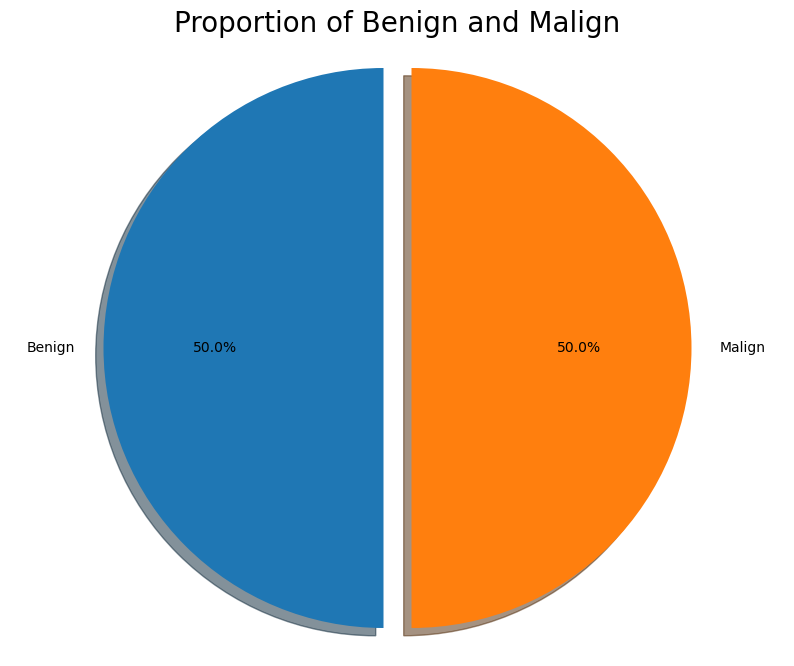

In [20]:
labels = 'Benign', 'Malign'
sizes = [ds.Class[ds['Class']==1].count(), ds.Class[ds['Class']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Benign and Malign", size = 20)
plt.show()

In [21]:
#get the size of train dataframe
print ("Rows     : " , ds.shape[0])  #get number of rows/observations
print ("Columns  : " , ds.shape[1]) #get number of columns
print ("#"*80,"\n","Features : \n\n", ds.columns.tolist()) #get name of columns/features
print ("#"*80,"\nMissing values :\n\n",ds.isnull().sum().sort_values(ascending=False))
print( "#"*80,"\nPercent of missing :\n\n", round(ds.isna().sum() / ds.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*80,"\nUnique values :  \n\n", ds.nunique())  #  count of unique values

Rows     :  90000
Columns  :  34
################################################################################ 
 Features : 

 ['Domain', 'DNSRecordType', 'MXDnsResponse', 'TXTDnsResponse', 'HasSPFInfo', 'HasDkimInfo', 'HasDmarcInfo', 'Ip', 'DomainInAlexaDB', 'CommonPorts', 'CountryCode', 'RegisteredCountry', 'CreationDate', 'LastUpdateDate', 'ASN', 'HttpResponseCode', 'RegisteredOrg', 'SubdomainNumber', 'Entropy', 'EntropyOfSubDomains', 'StrangeCharacters', 'TLD', 'IpReputation', 'DomainReputation', 'ConsoantRatio', 'NumericRatio', 'SpecialCharRatio', 'VowelRatio', 'ConsoantSequence', 'VowelSequence', 'NumericSequence', 'SpecialCharSequence', 'DomainLength', 'Class']
################################################################################ 
Missing values :

 Domain                 0
NumericRatio           0
EntropyOfSubDomains    0
StrangeCharacters      0
TLD                    0
IpReputation           0
DomainReputation       0
ConsoantRatio          0
SpecialCharRatio   

In [22]:
cat_cols= ds.select_dtypes(['category'])
num_cols= ds.select_dtypes(['int64','float64'])
bool_cols= ds.select_dtypes(['bool'])

In [23]:
# Defining the function for creating boxplot and hisogram
def histogram_boxplot(data, feature, figsize=(15, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots

    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column

    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram

    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram

    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

In [24]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

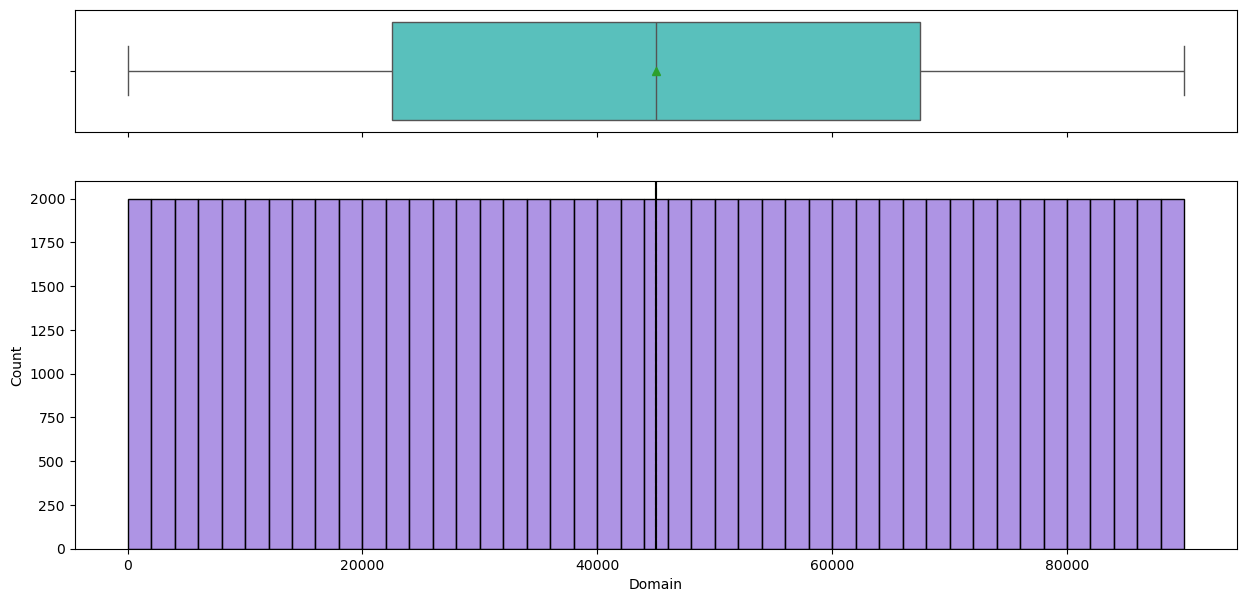

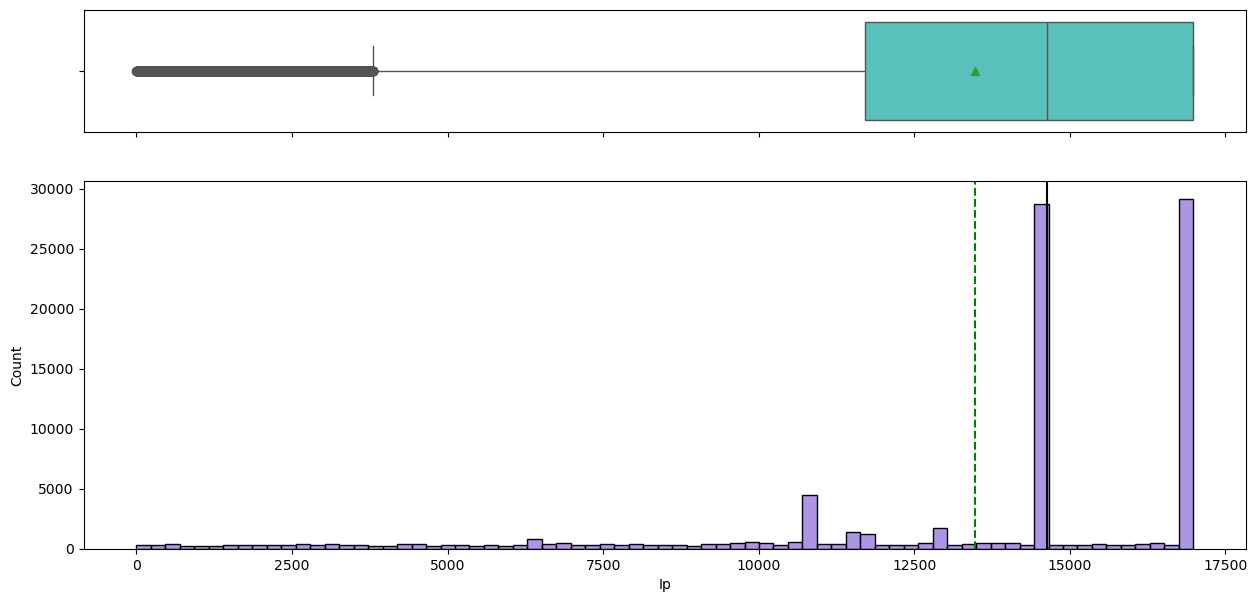

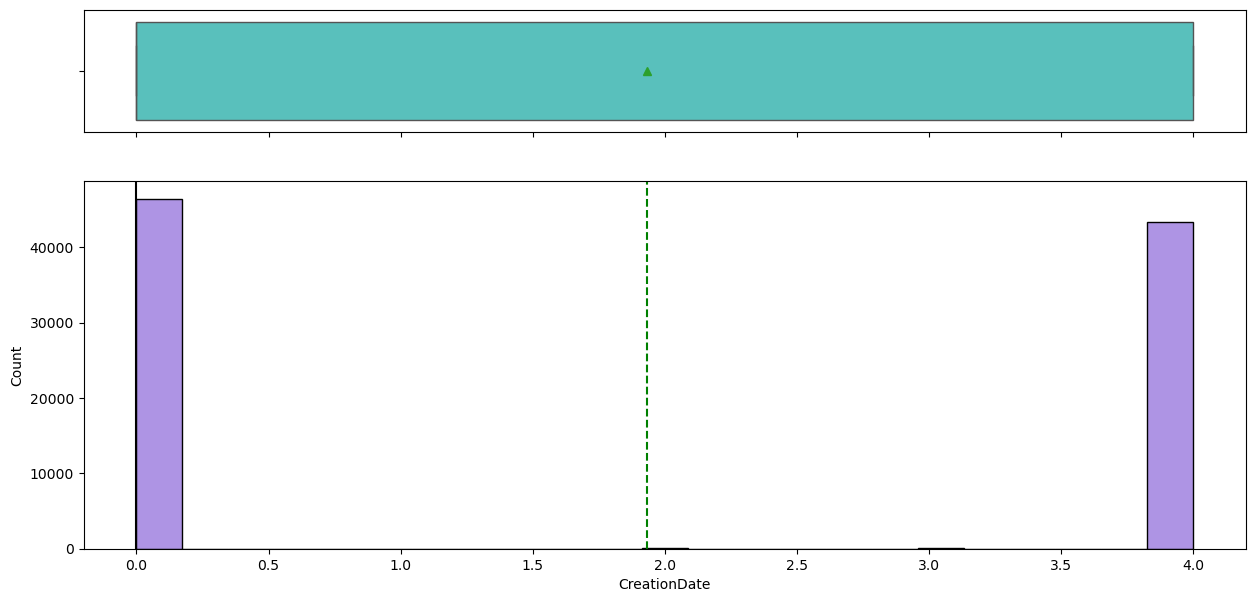

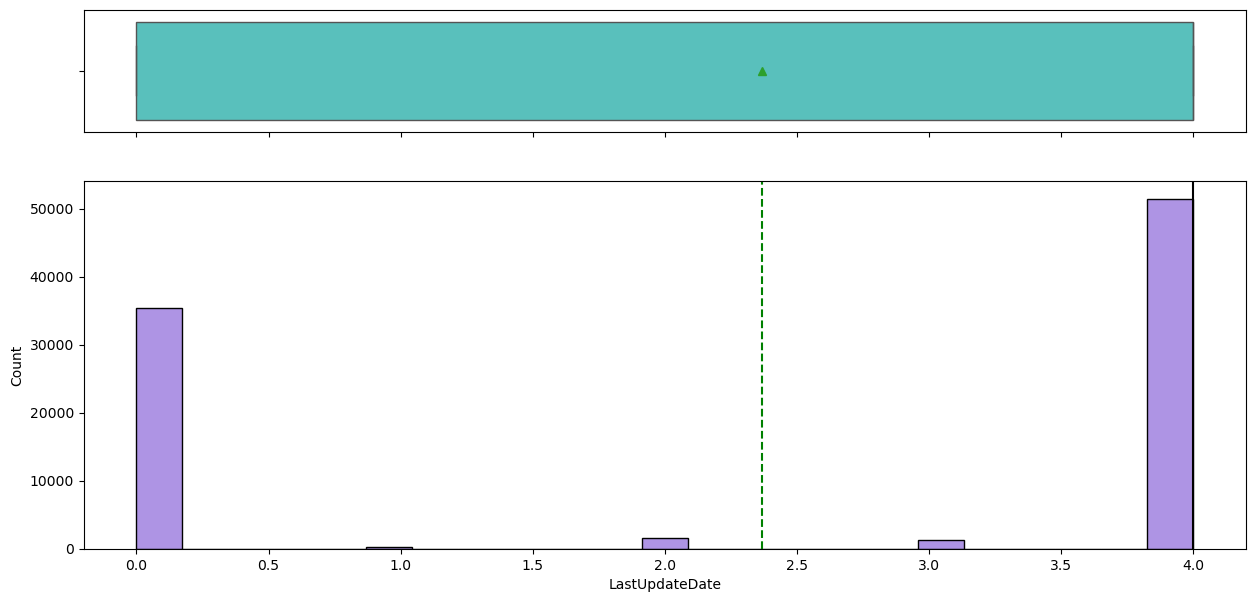

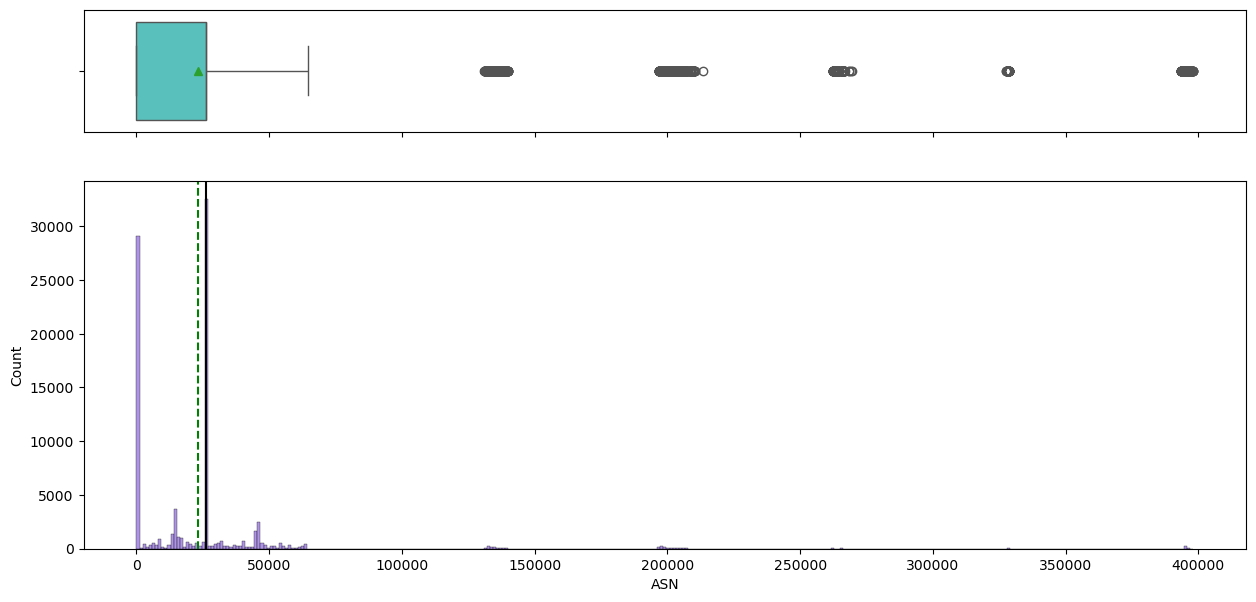

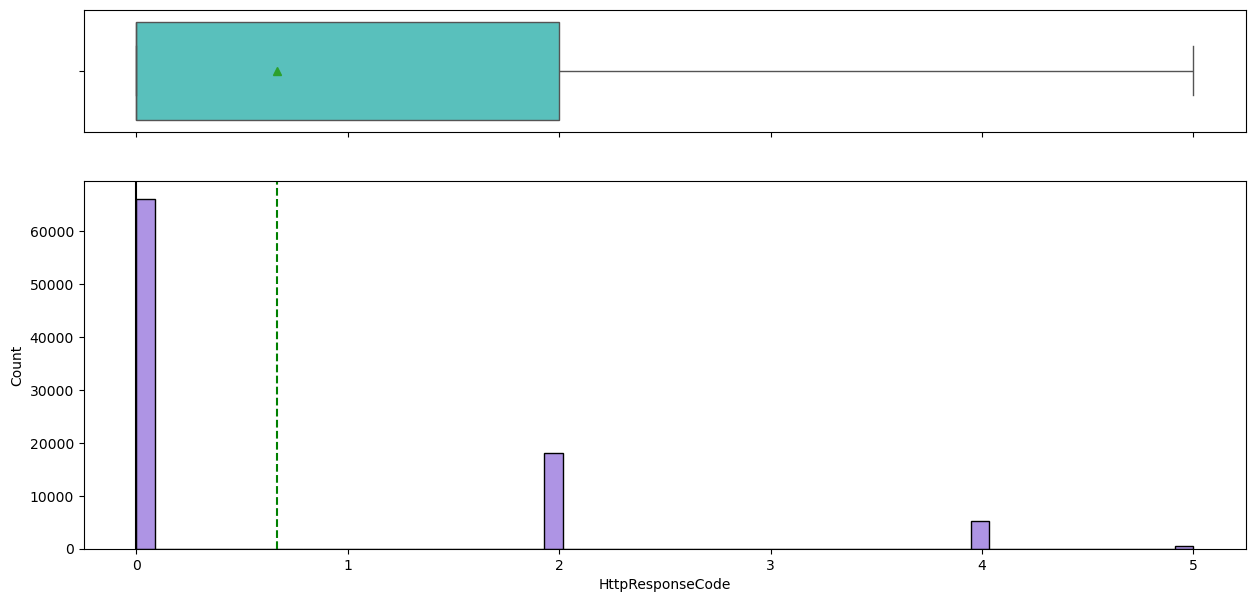

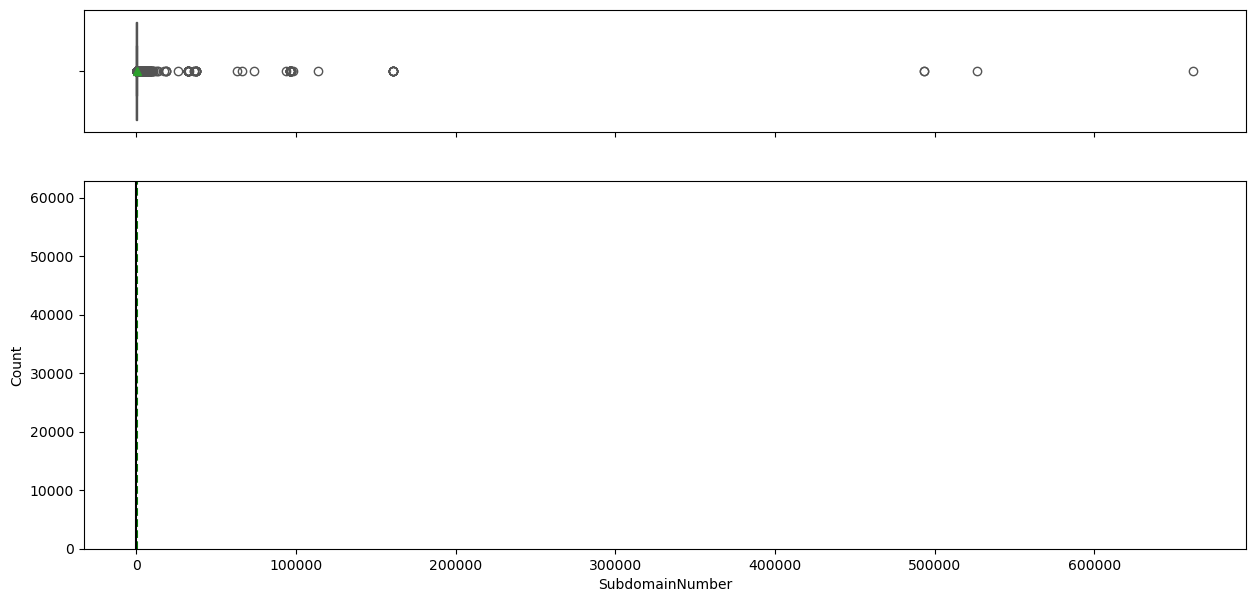

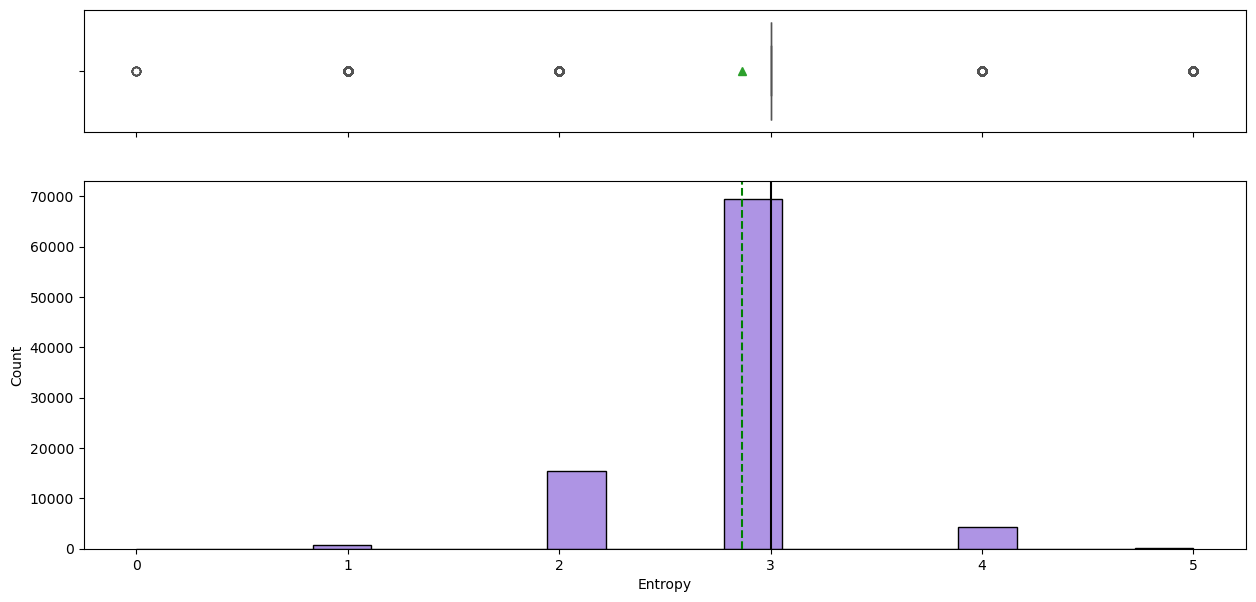

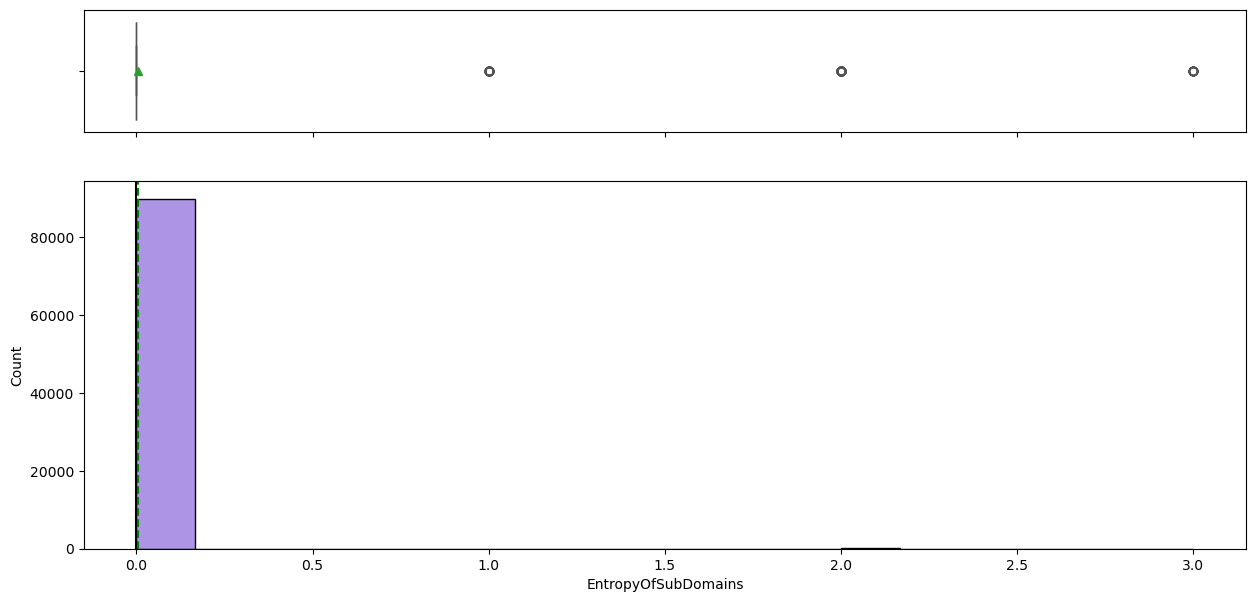

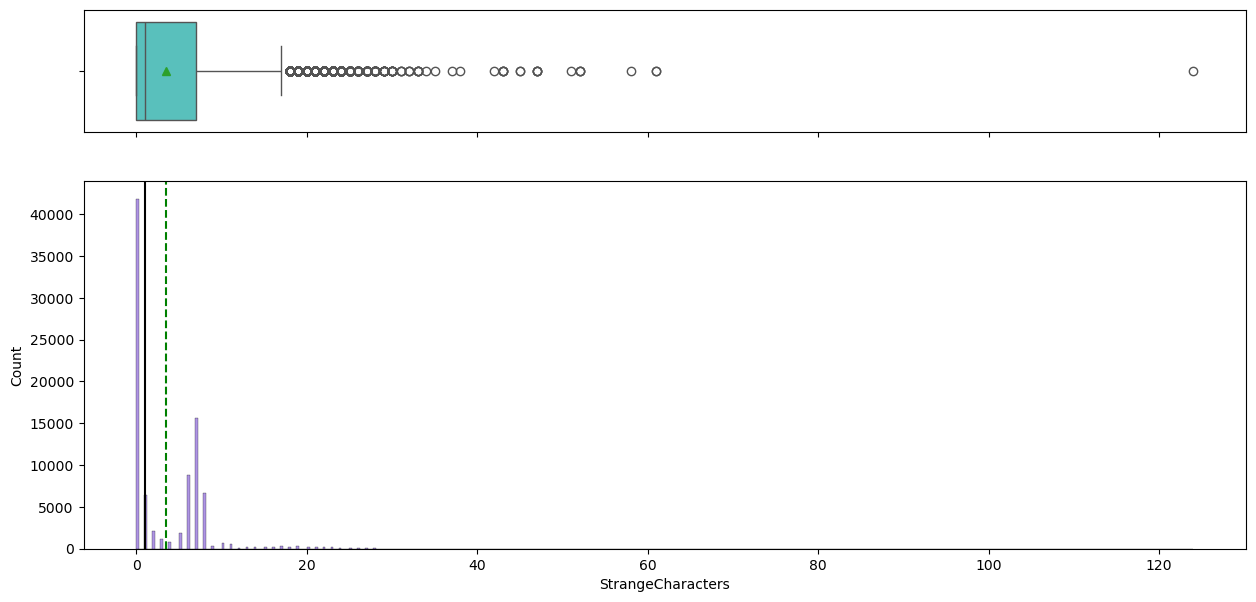

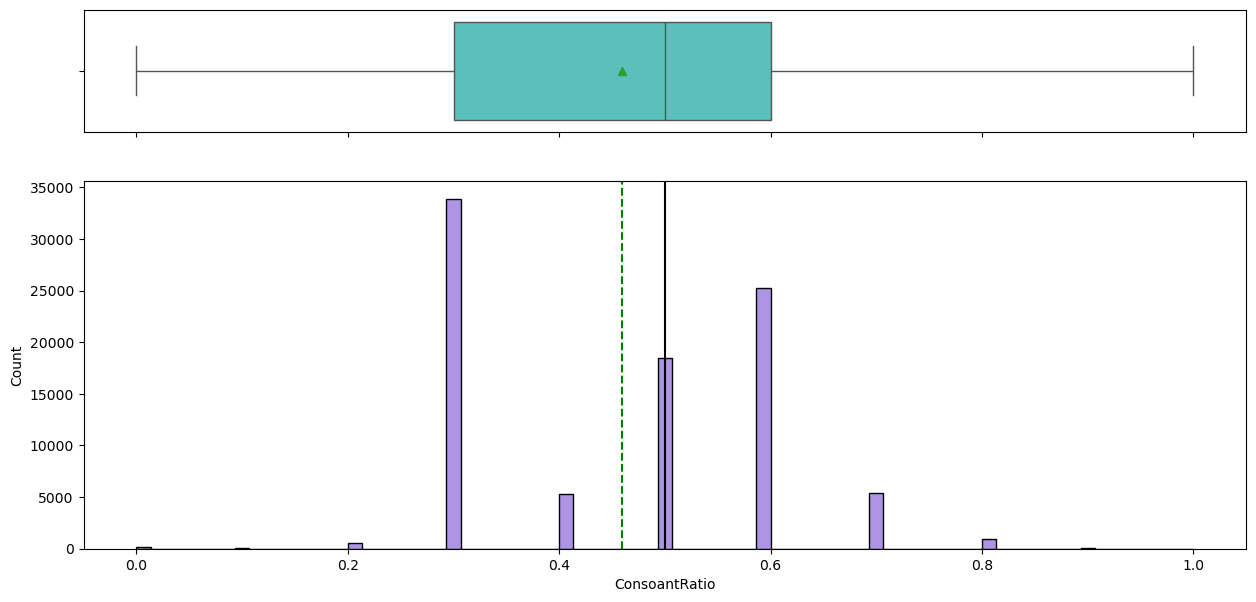

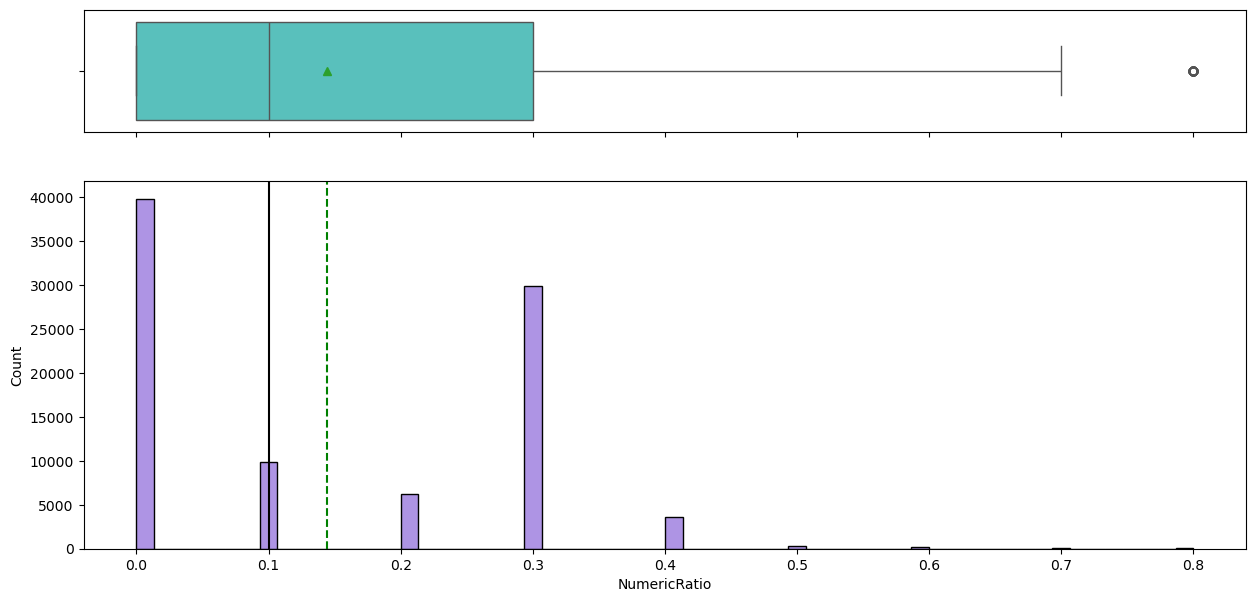

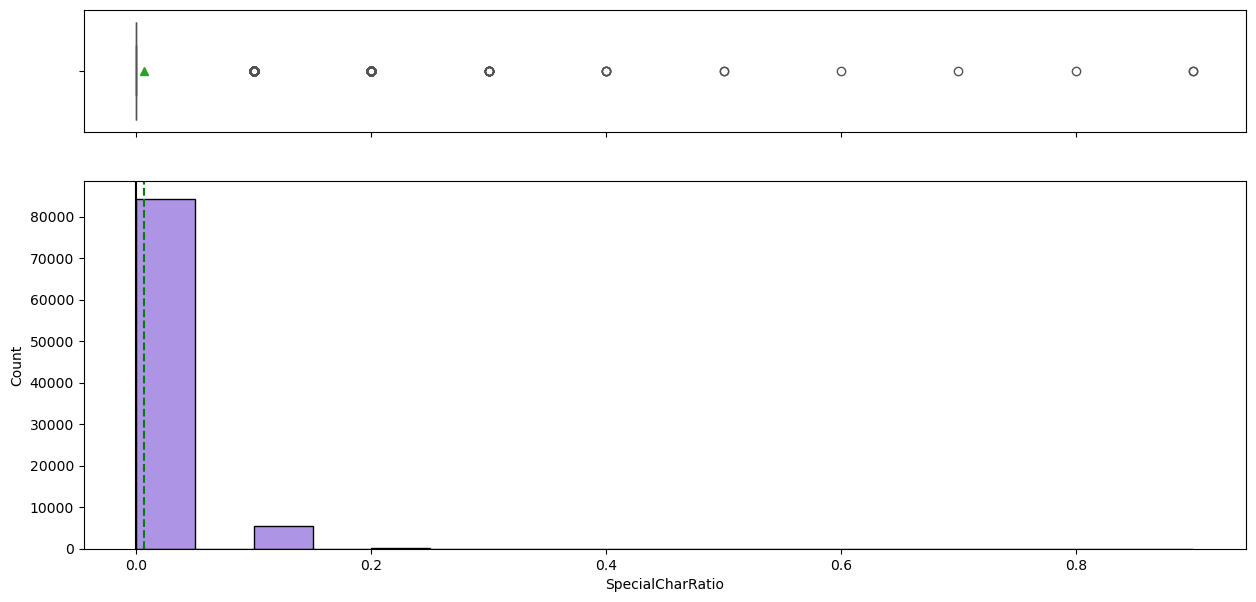

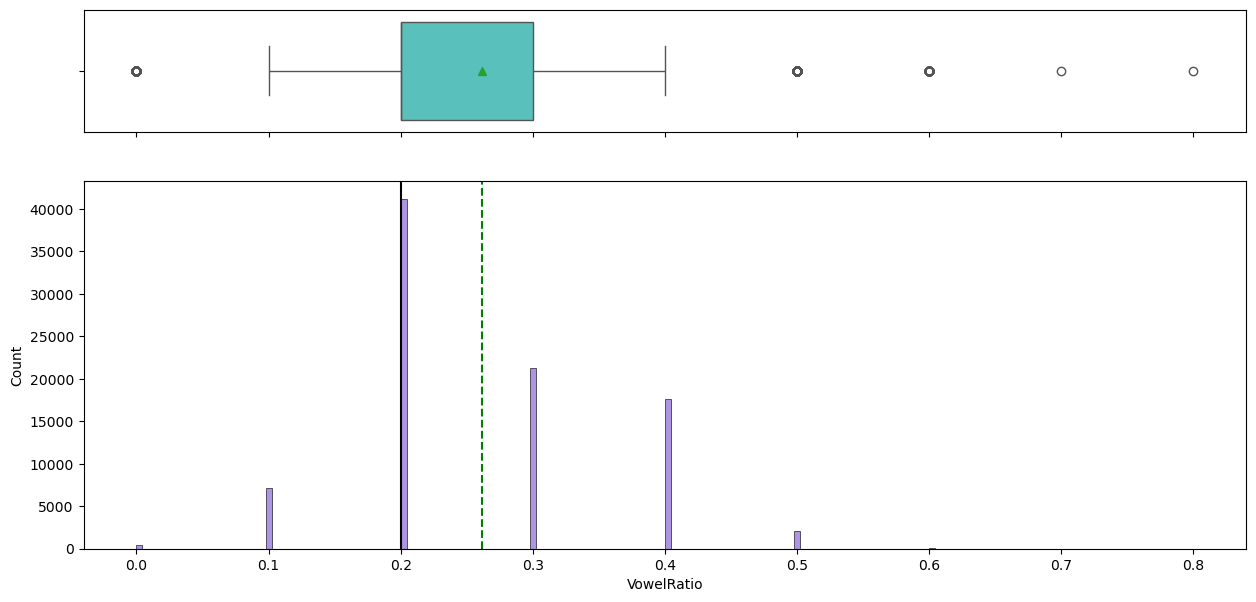

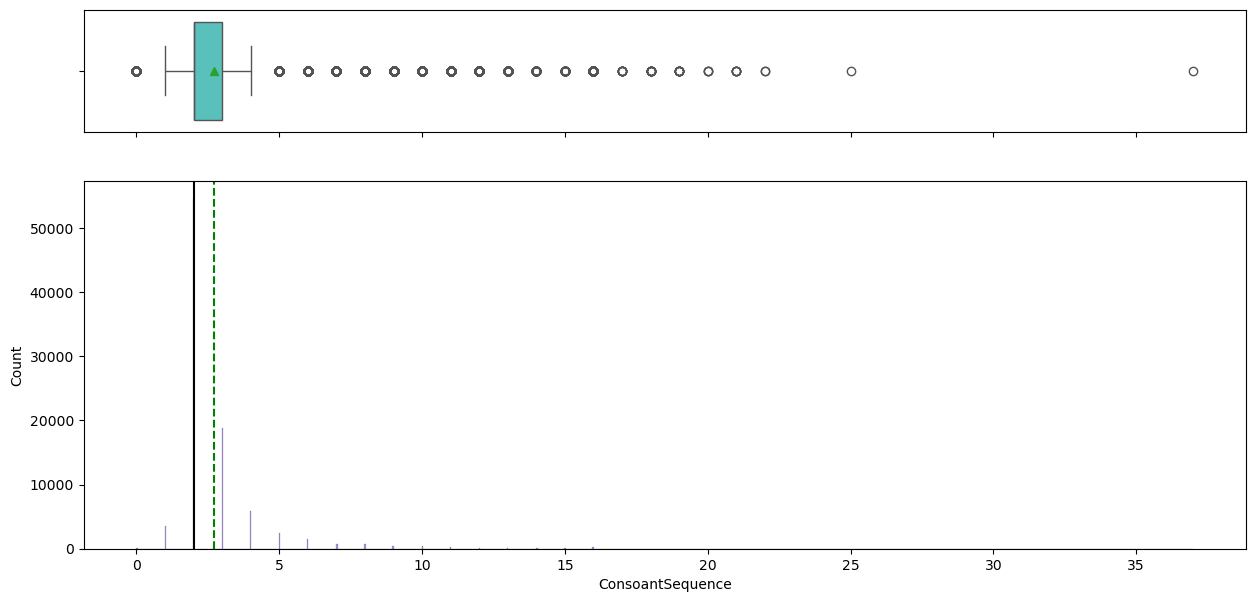

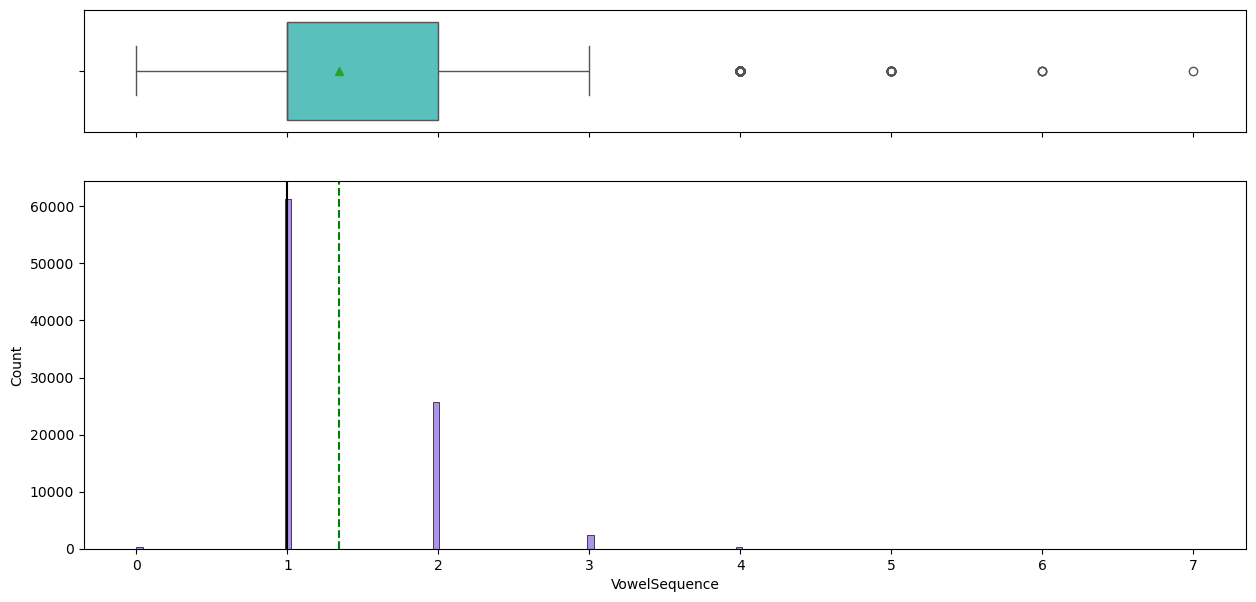

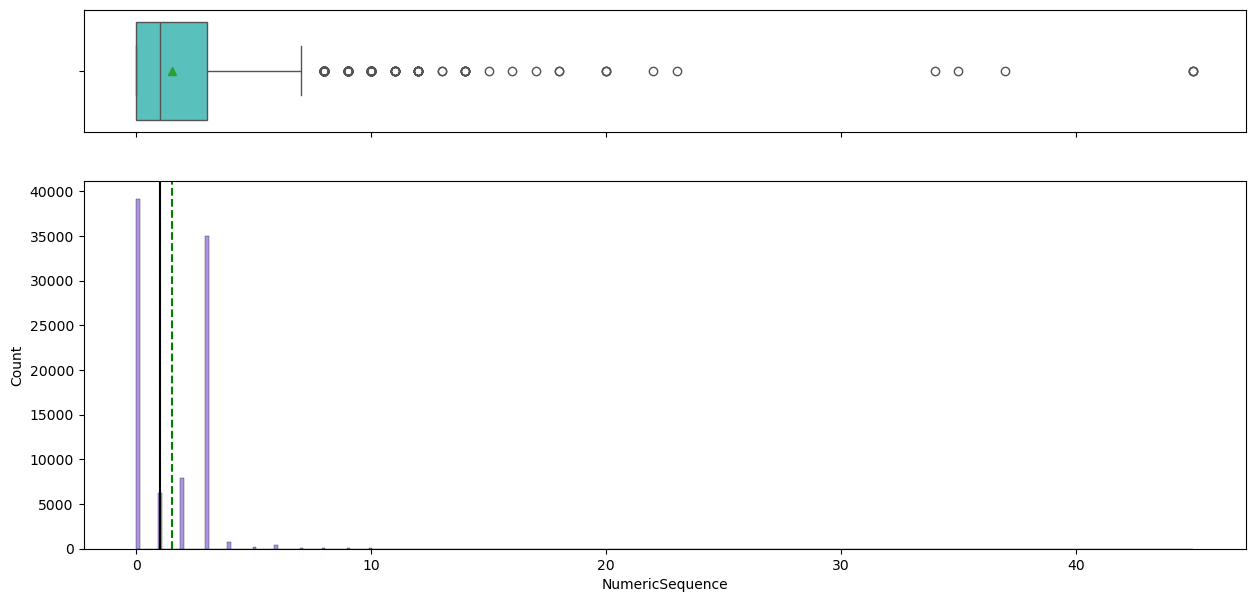

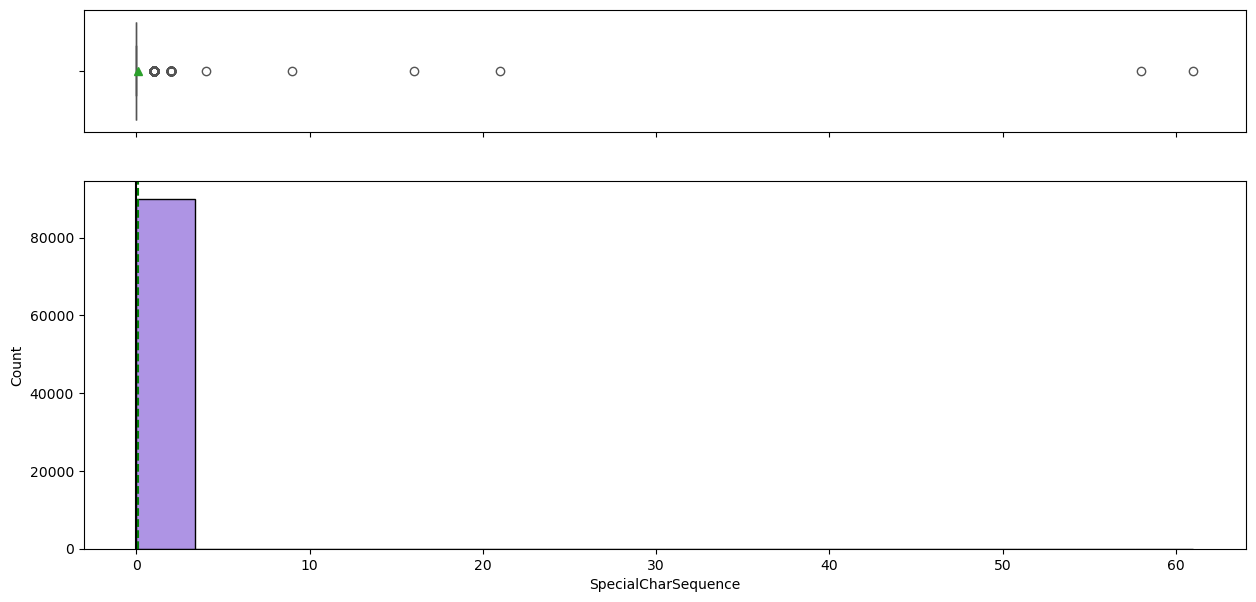

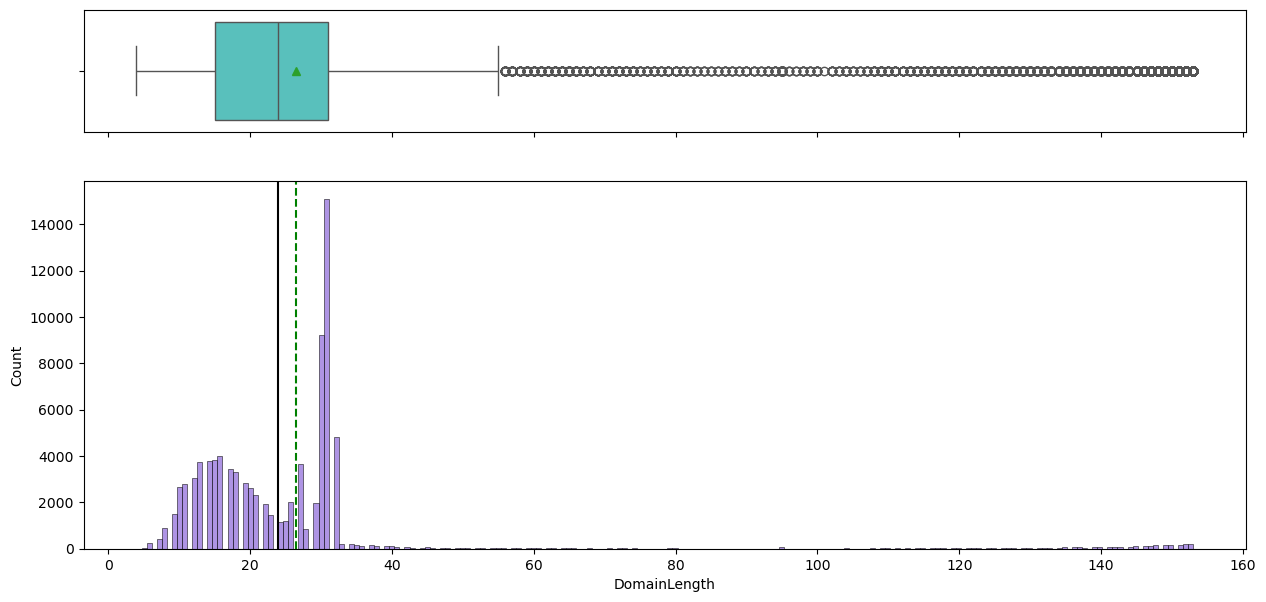

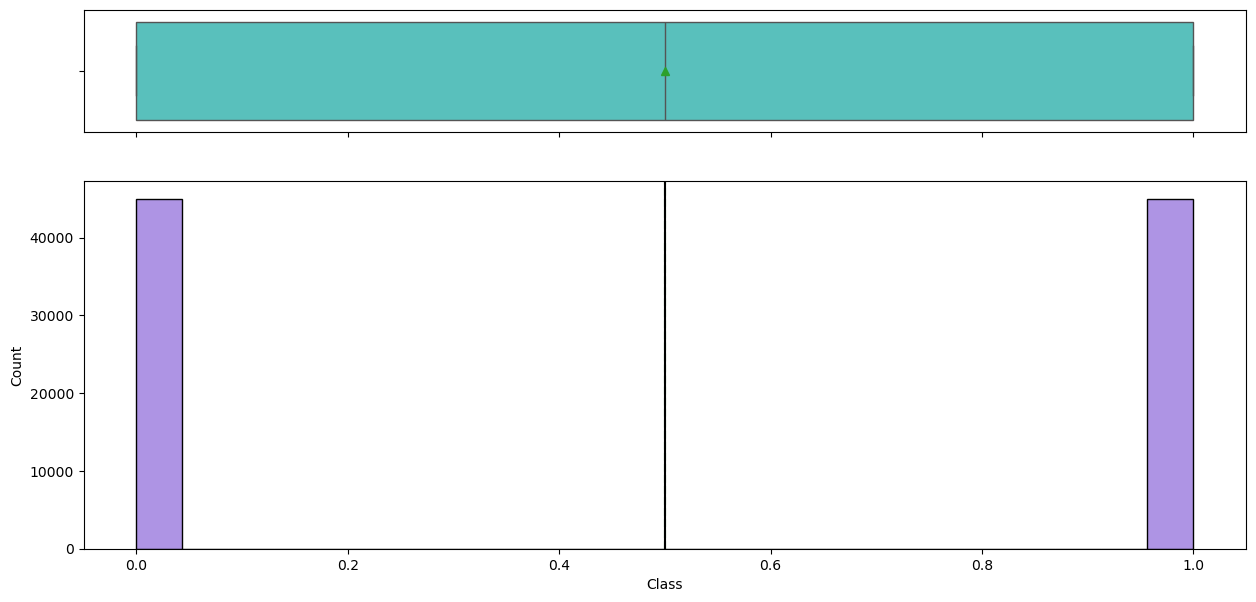

In [25]:
for column in num_cols:
  histogram_boxplot(ds,column)

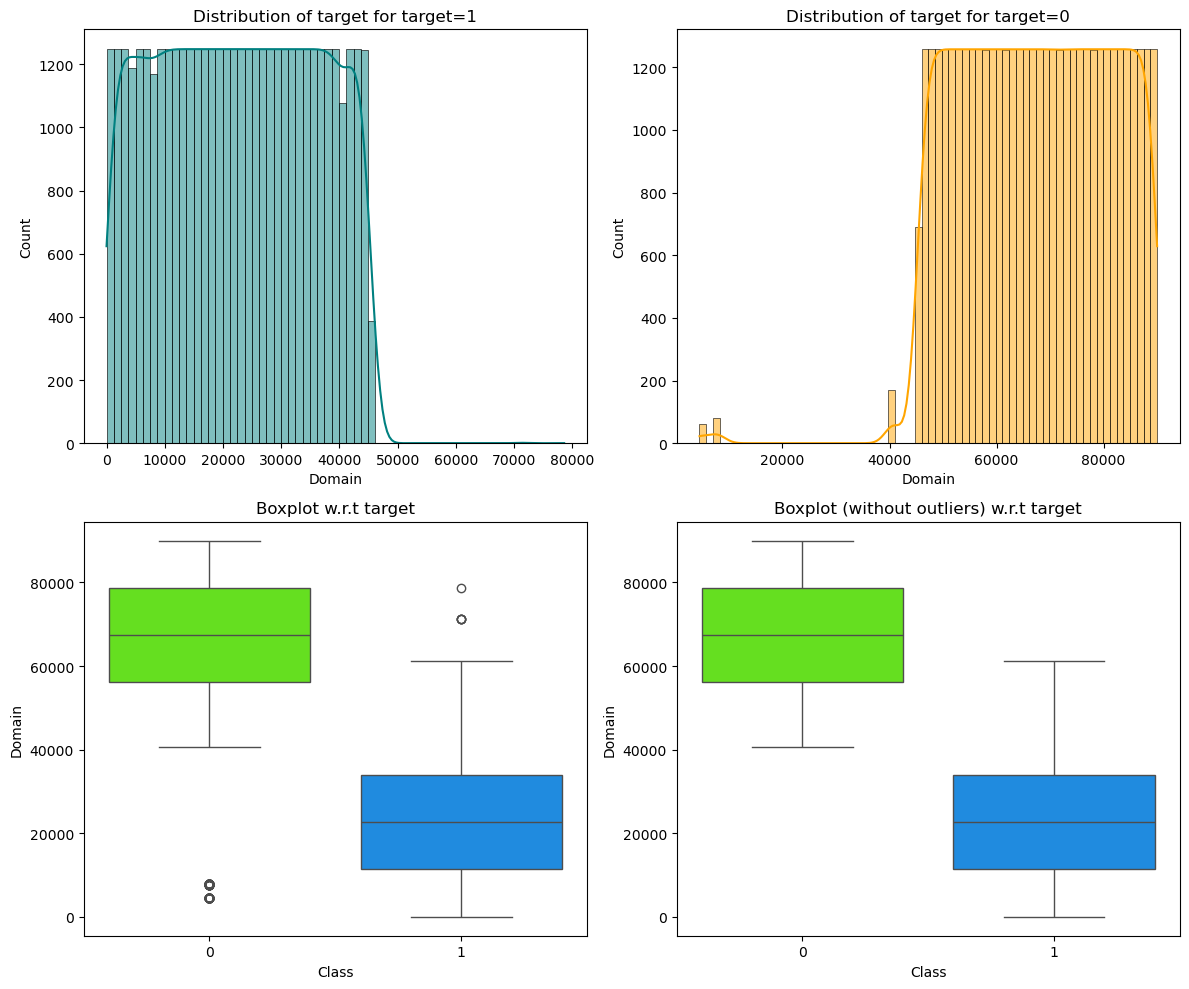

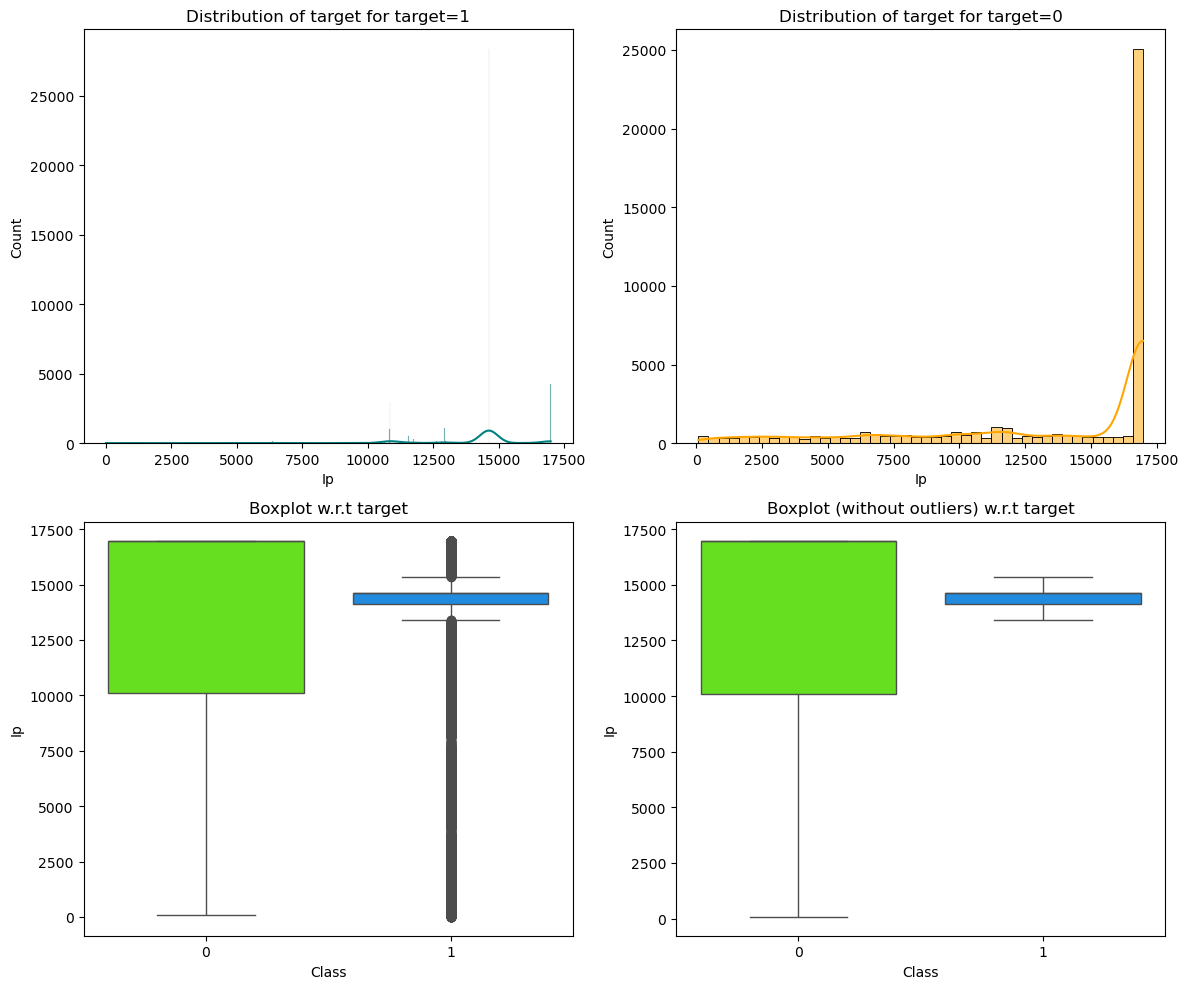

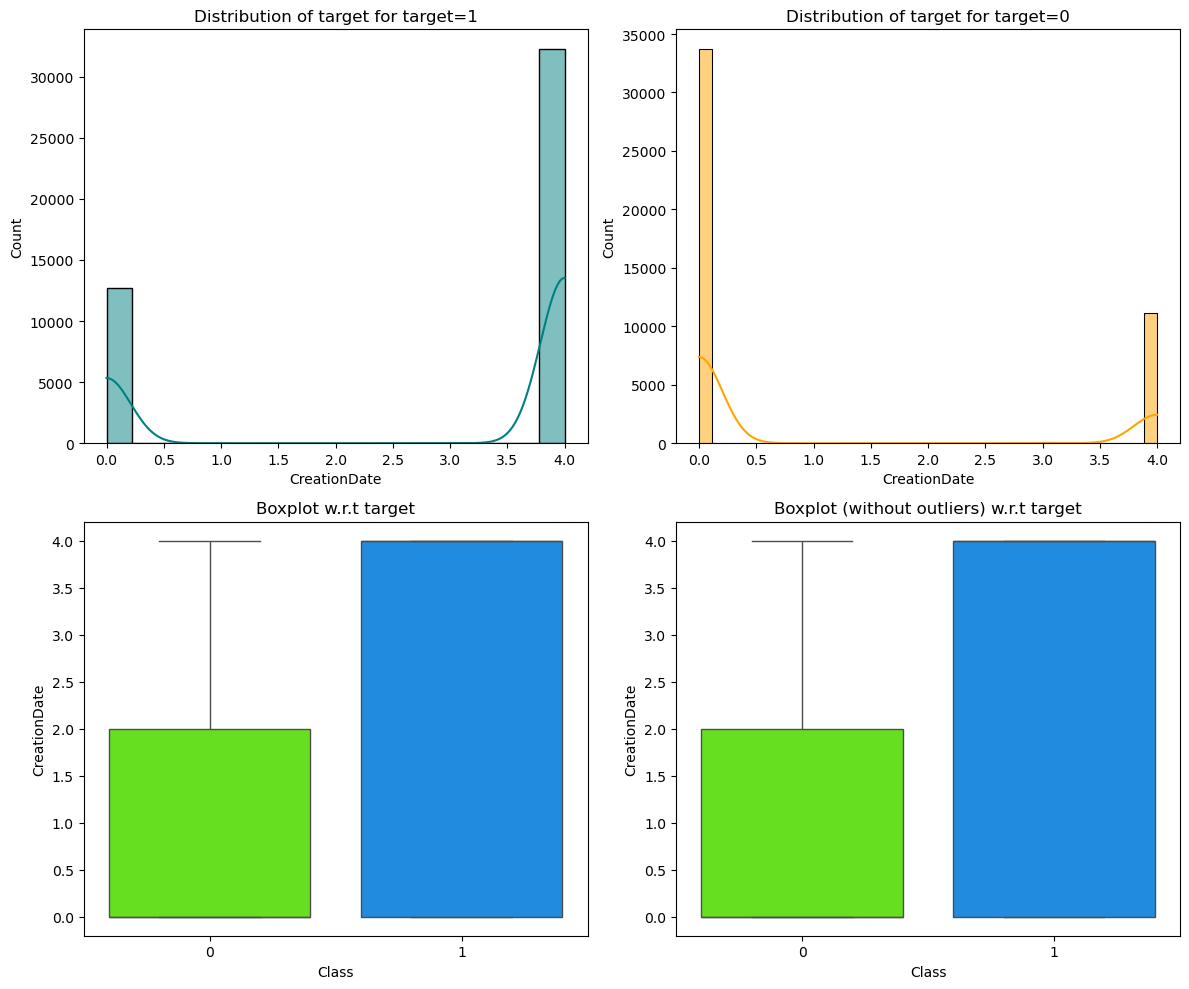

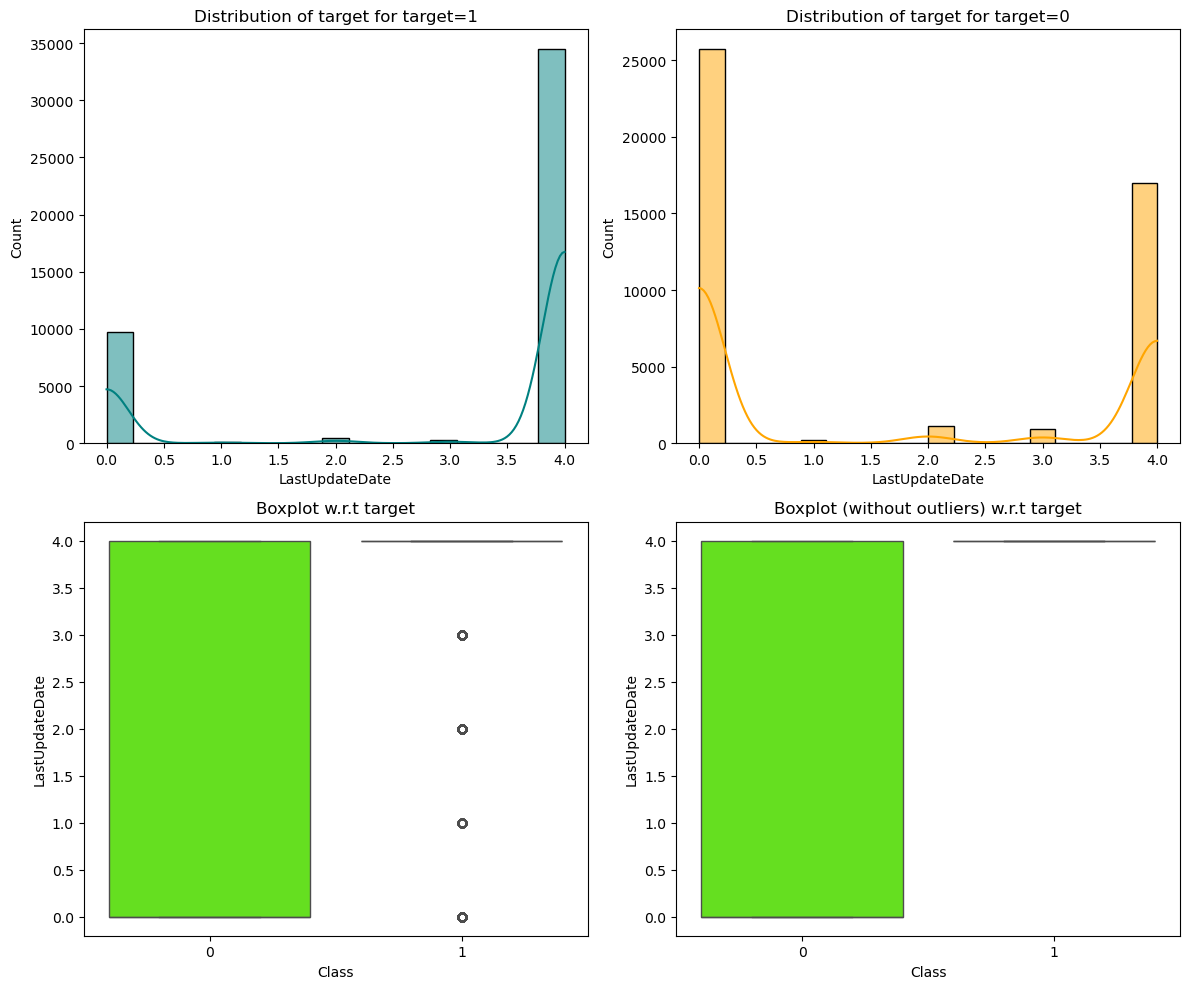

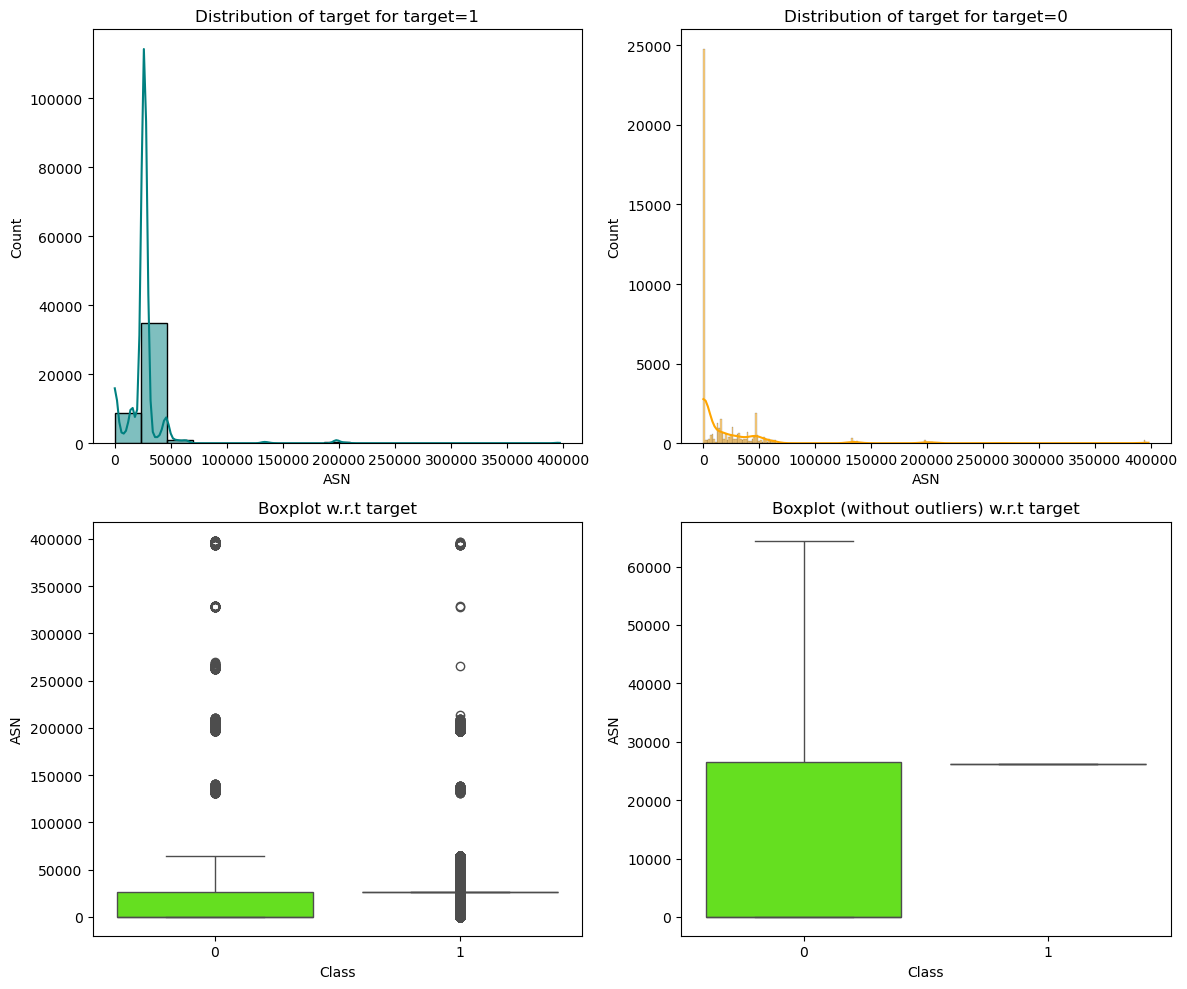

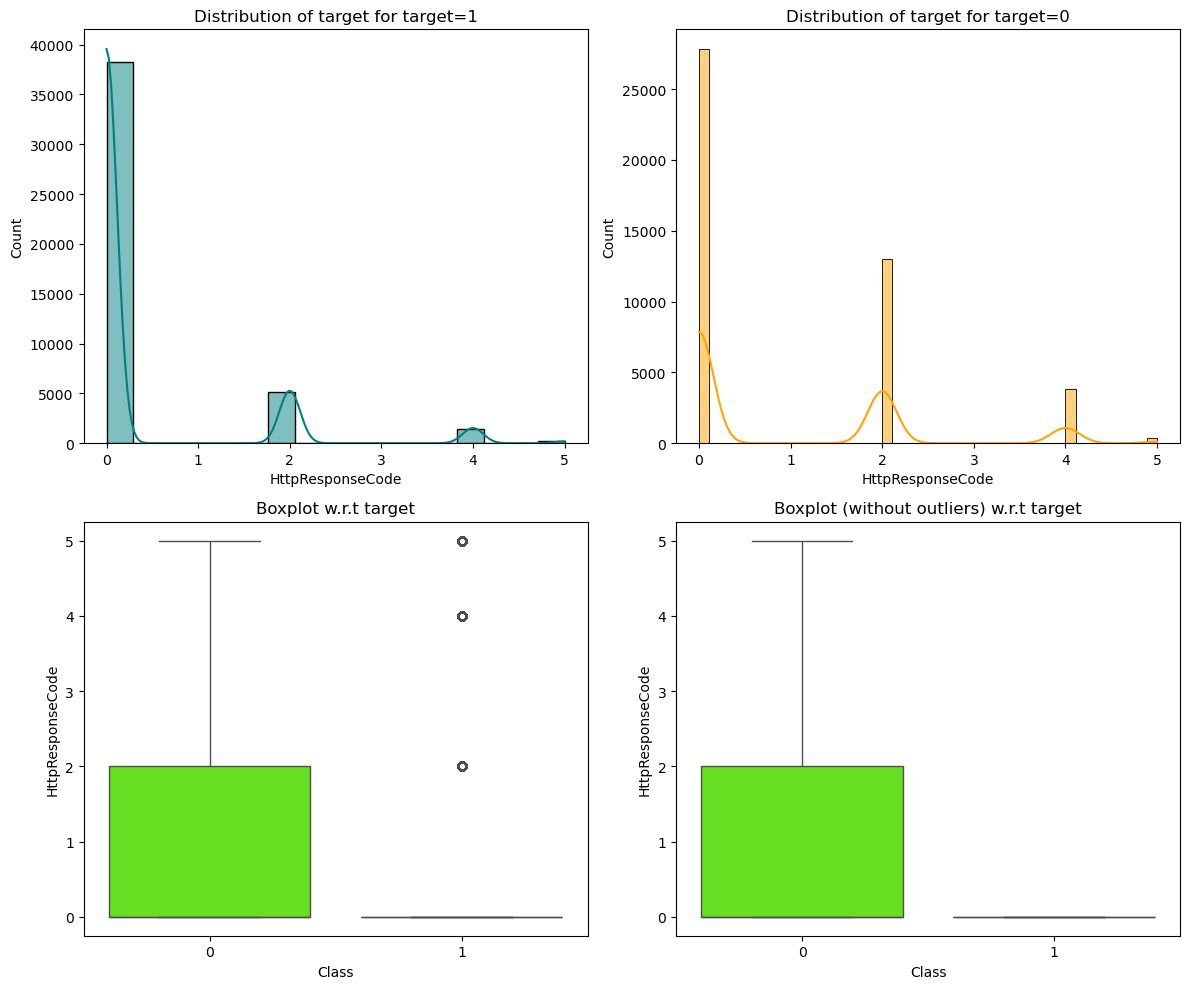

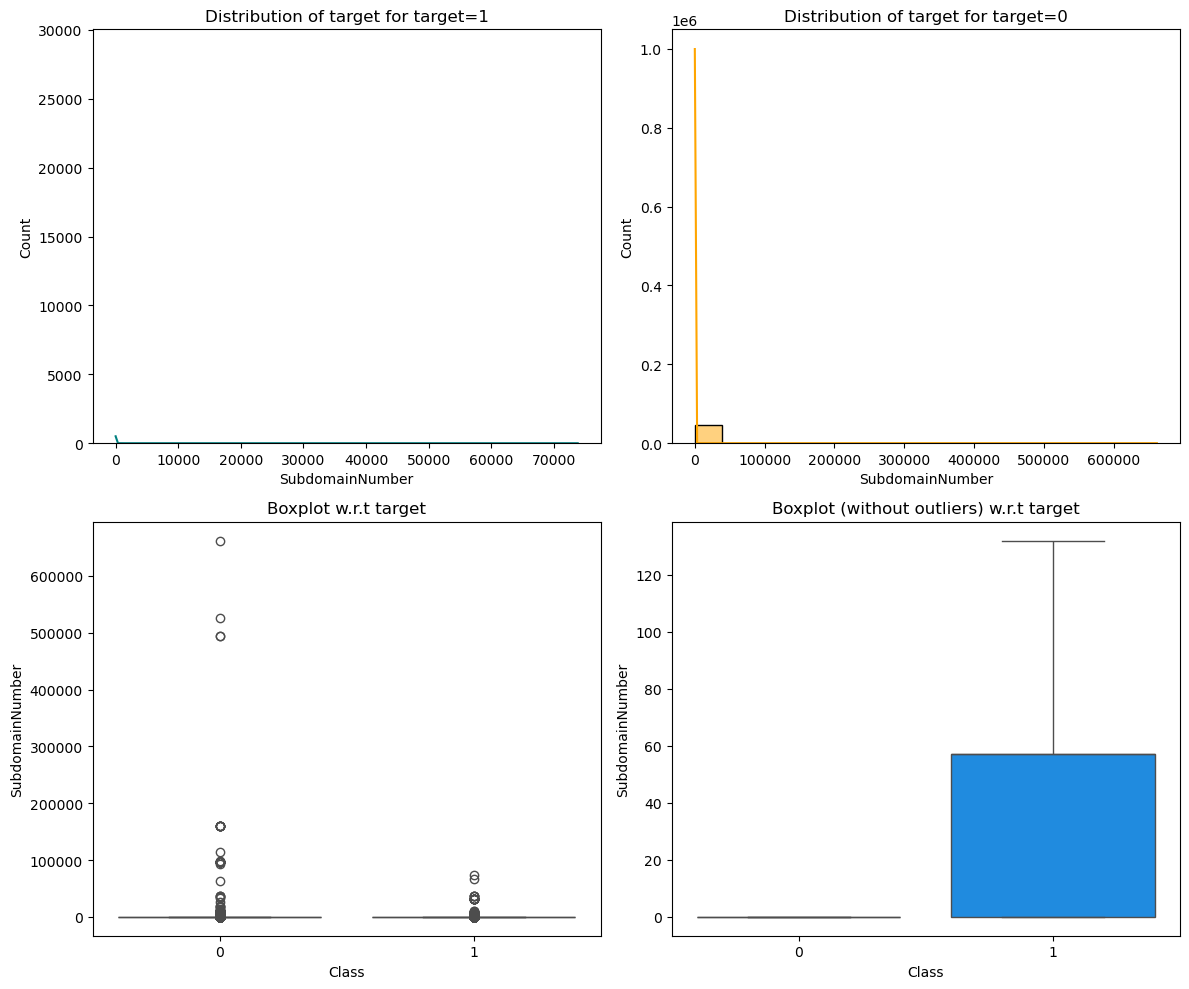

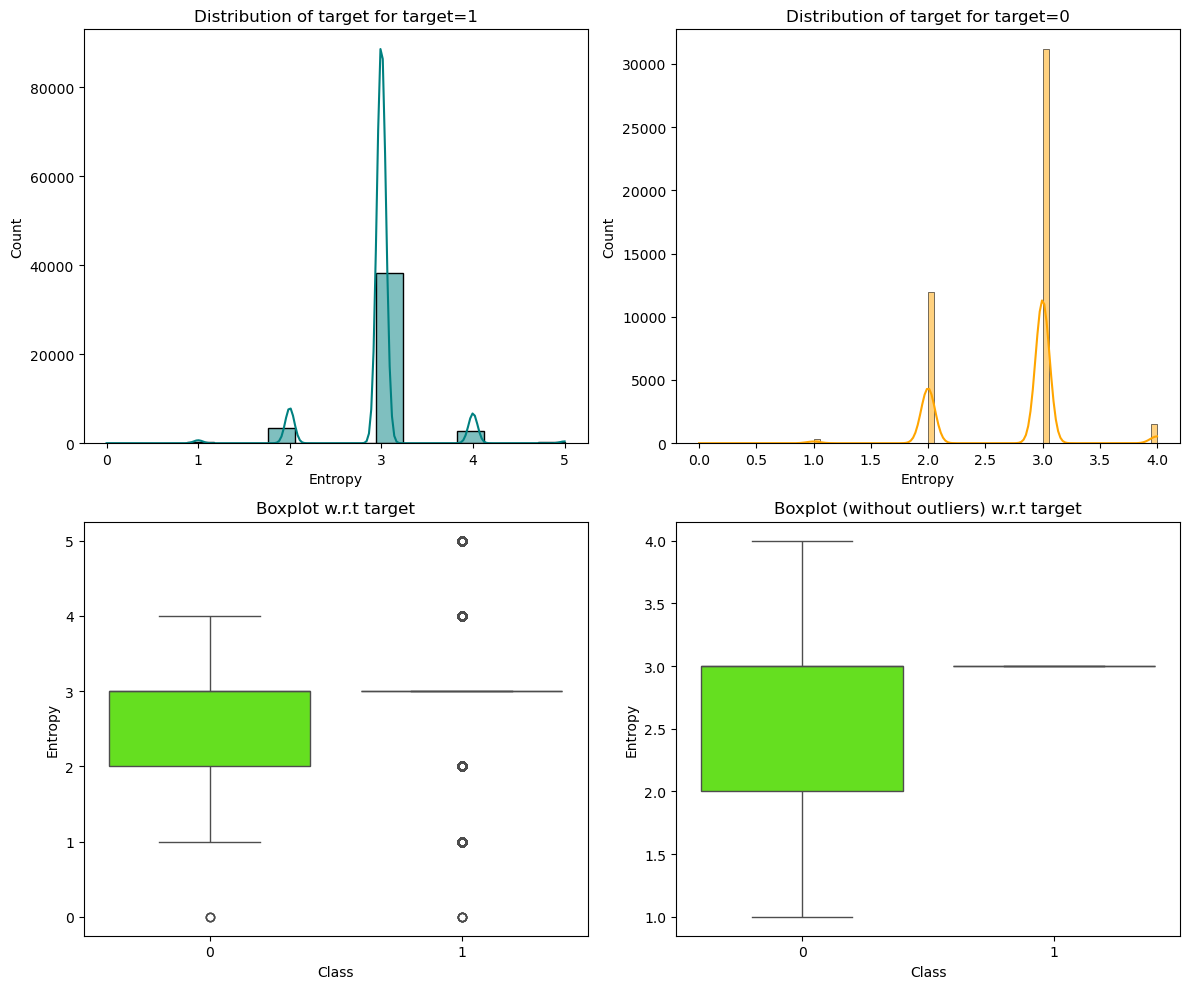

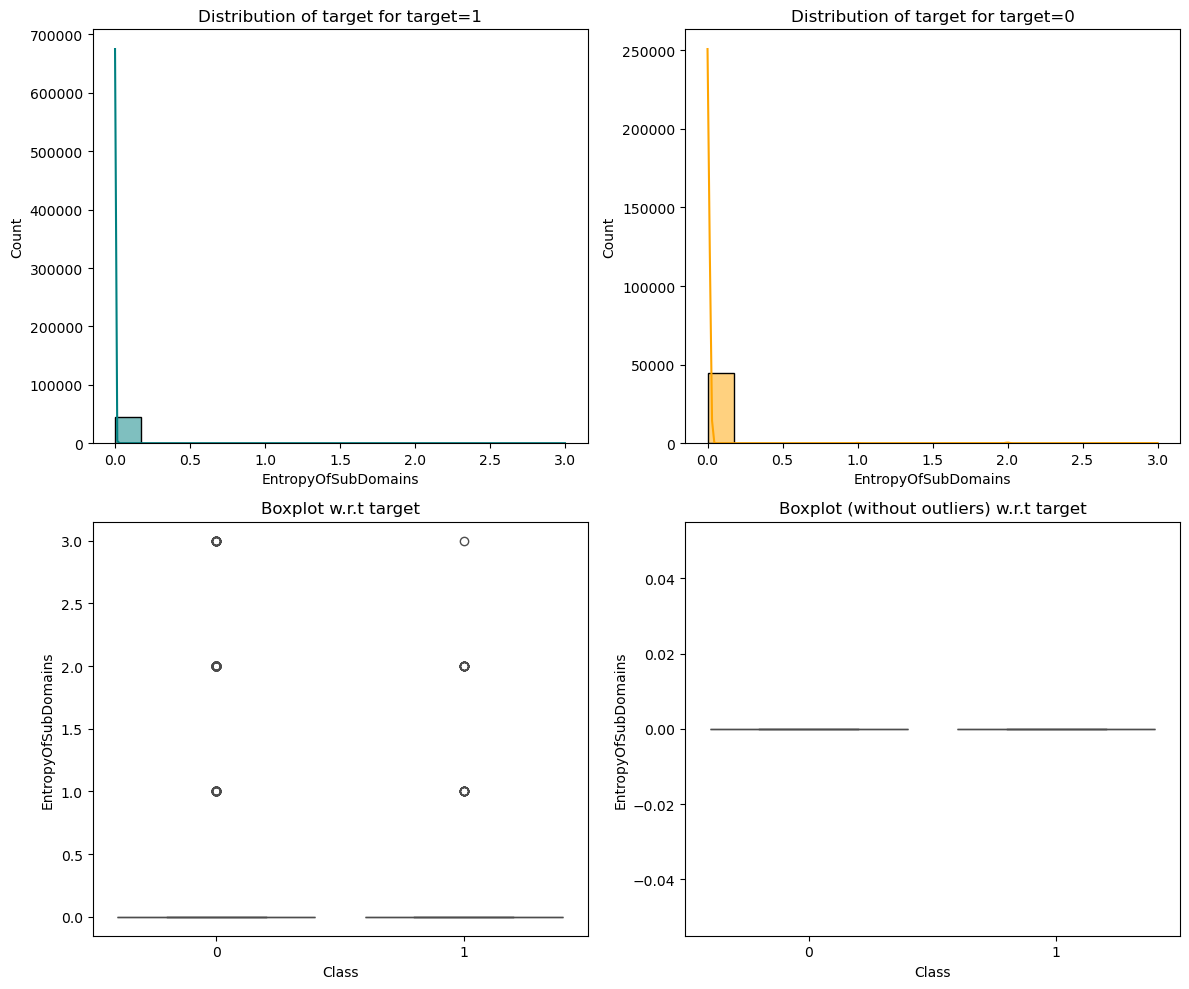

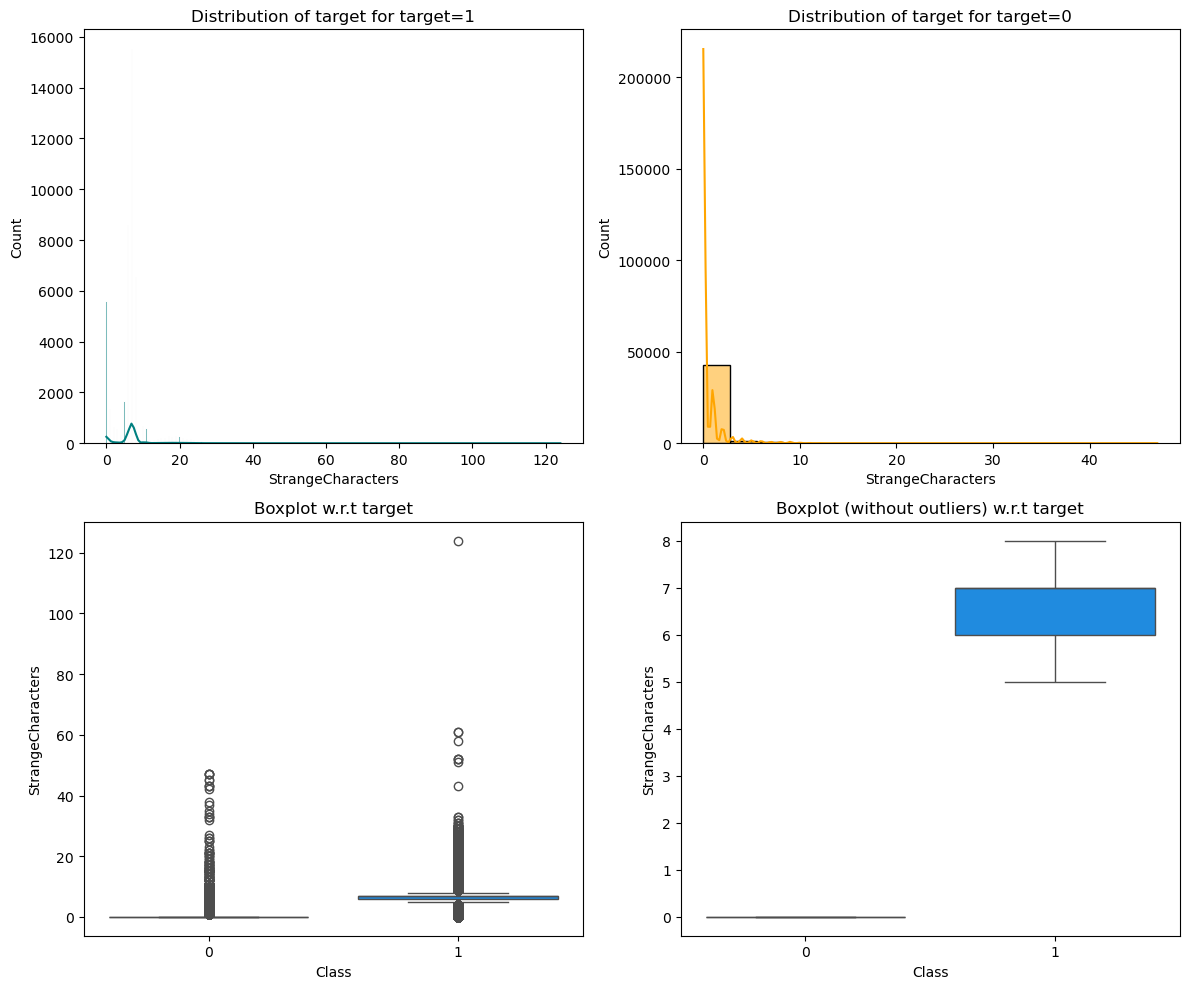

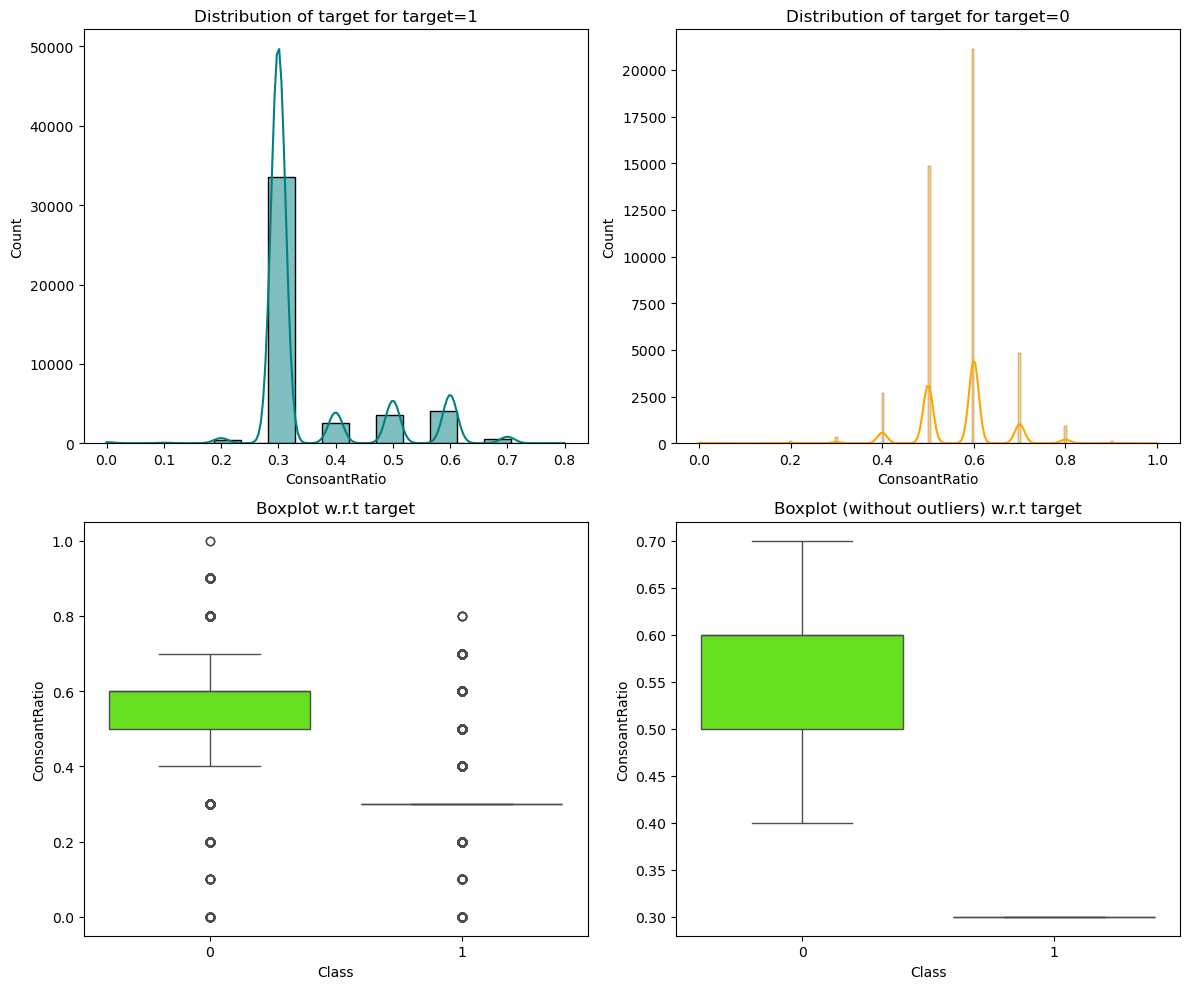

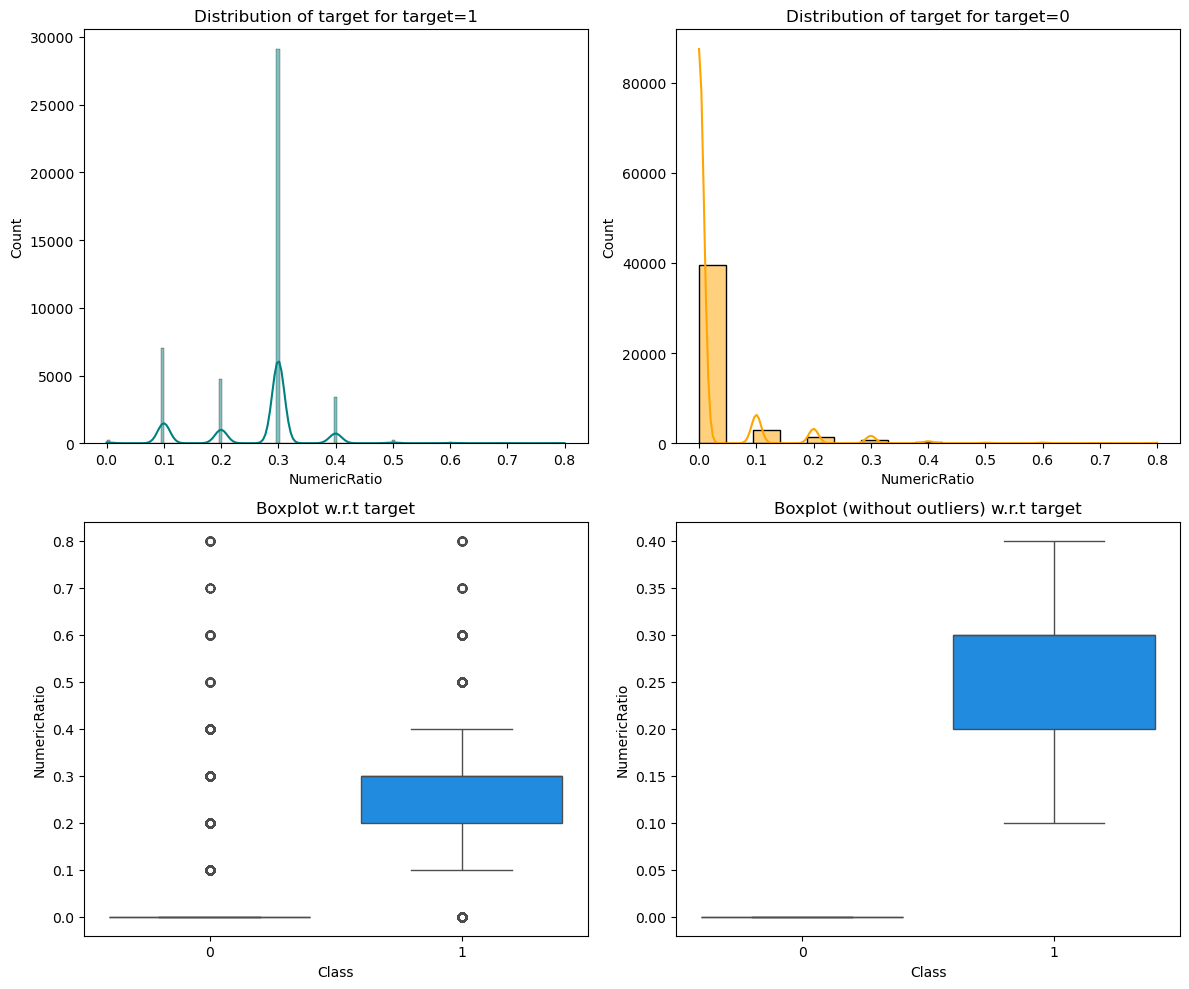

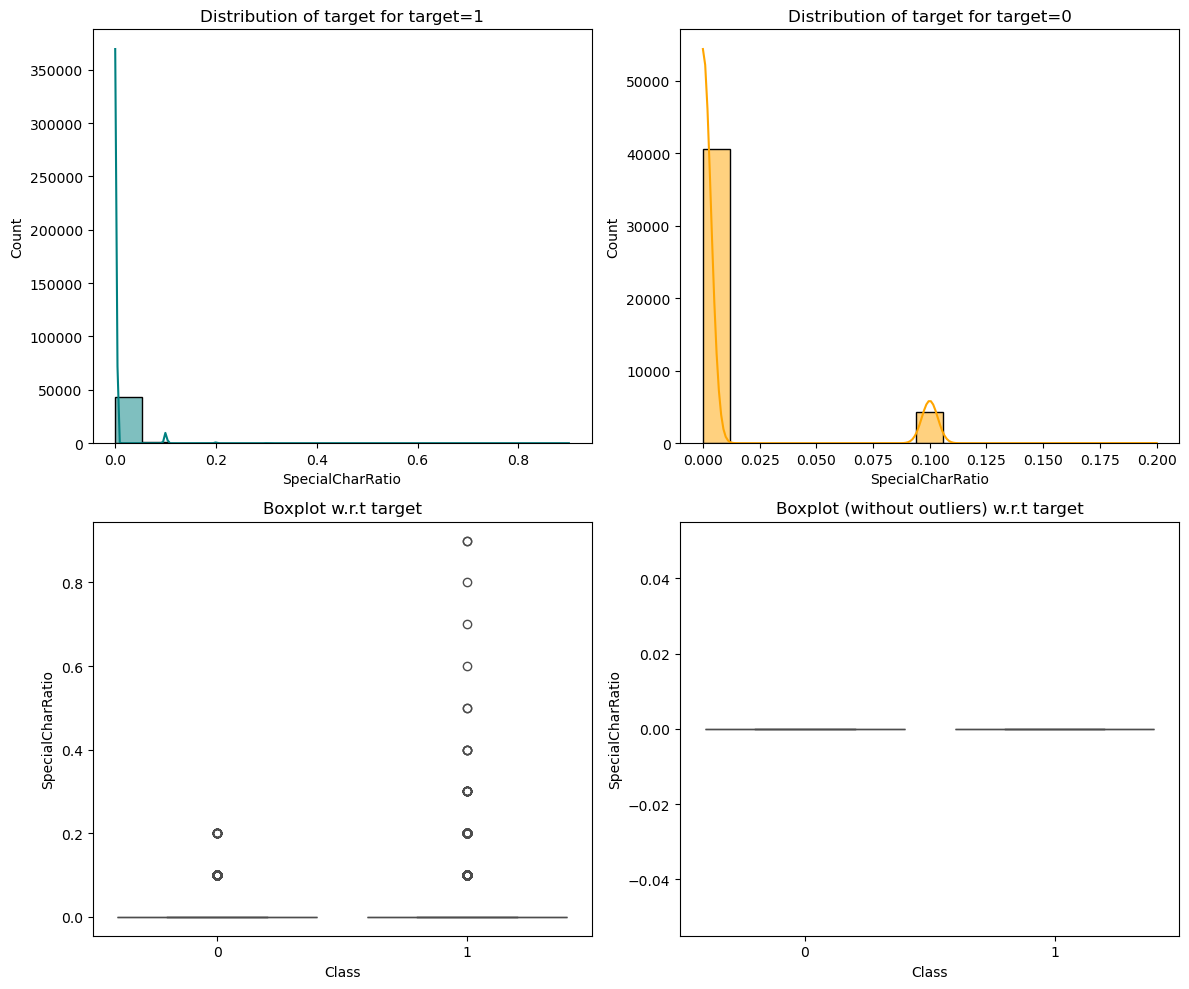

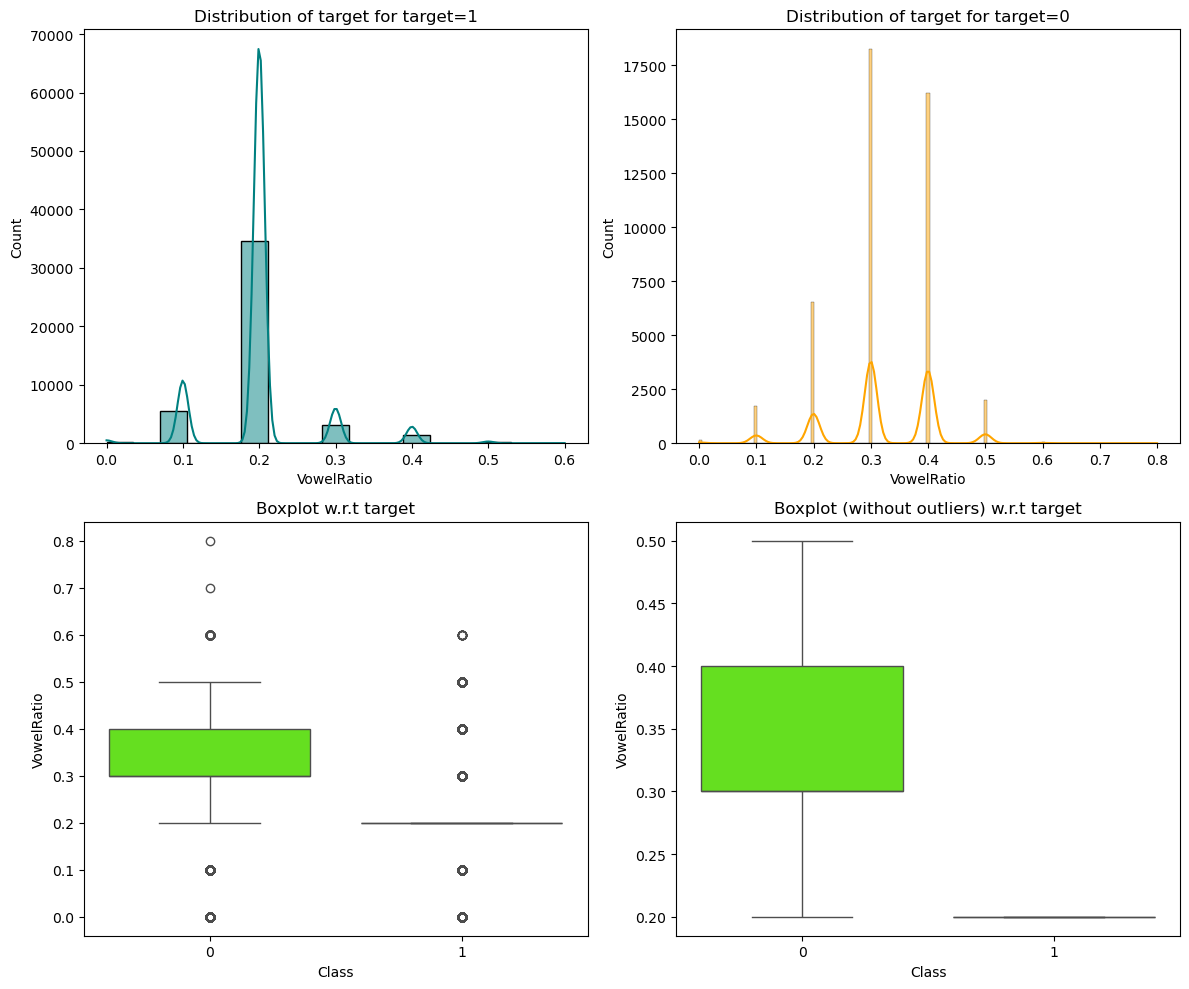

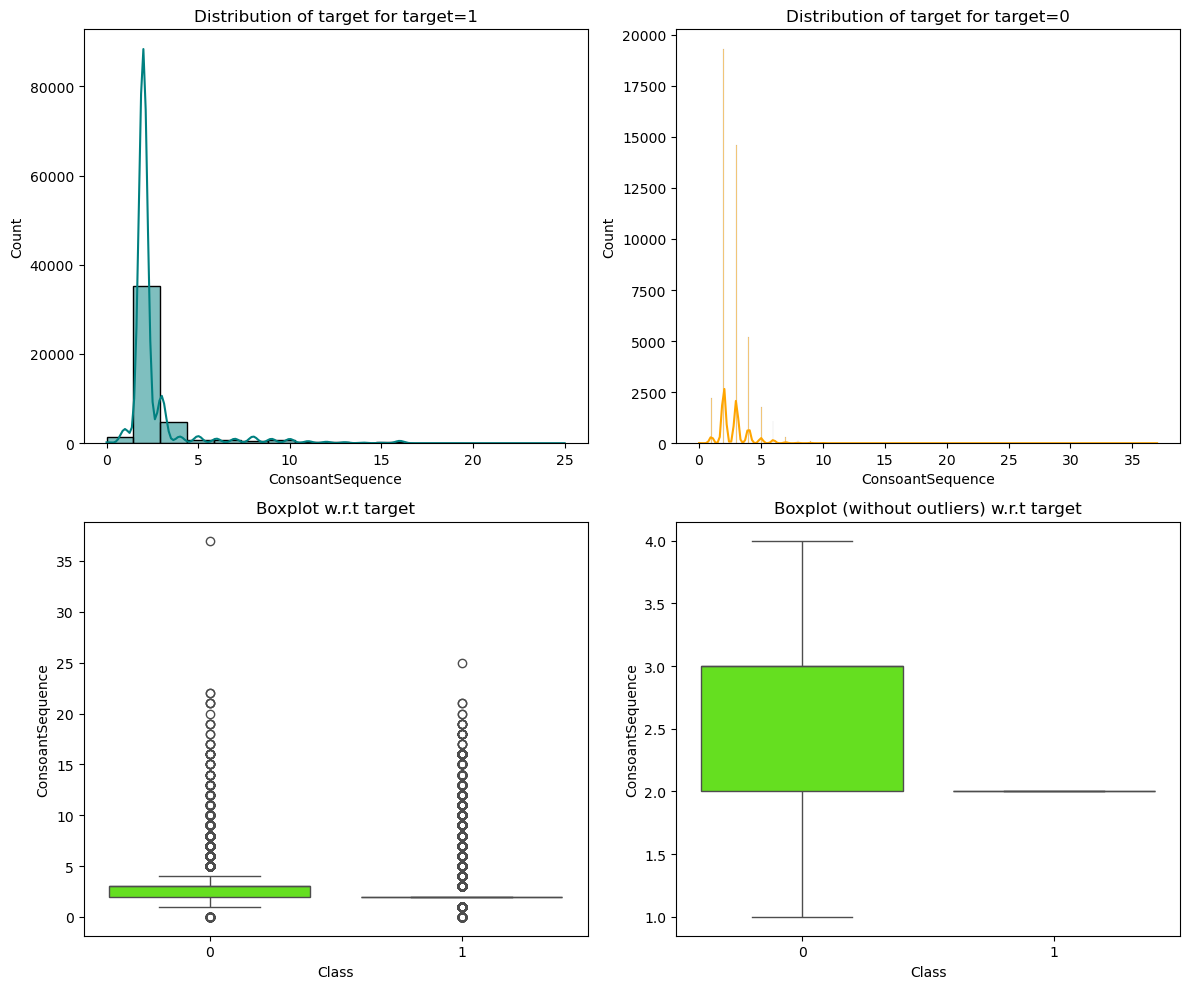

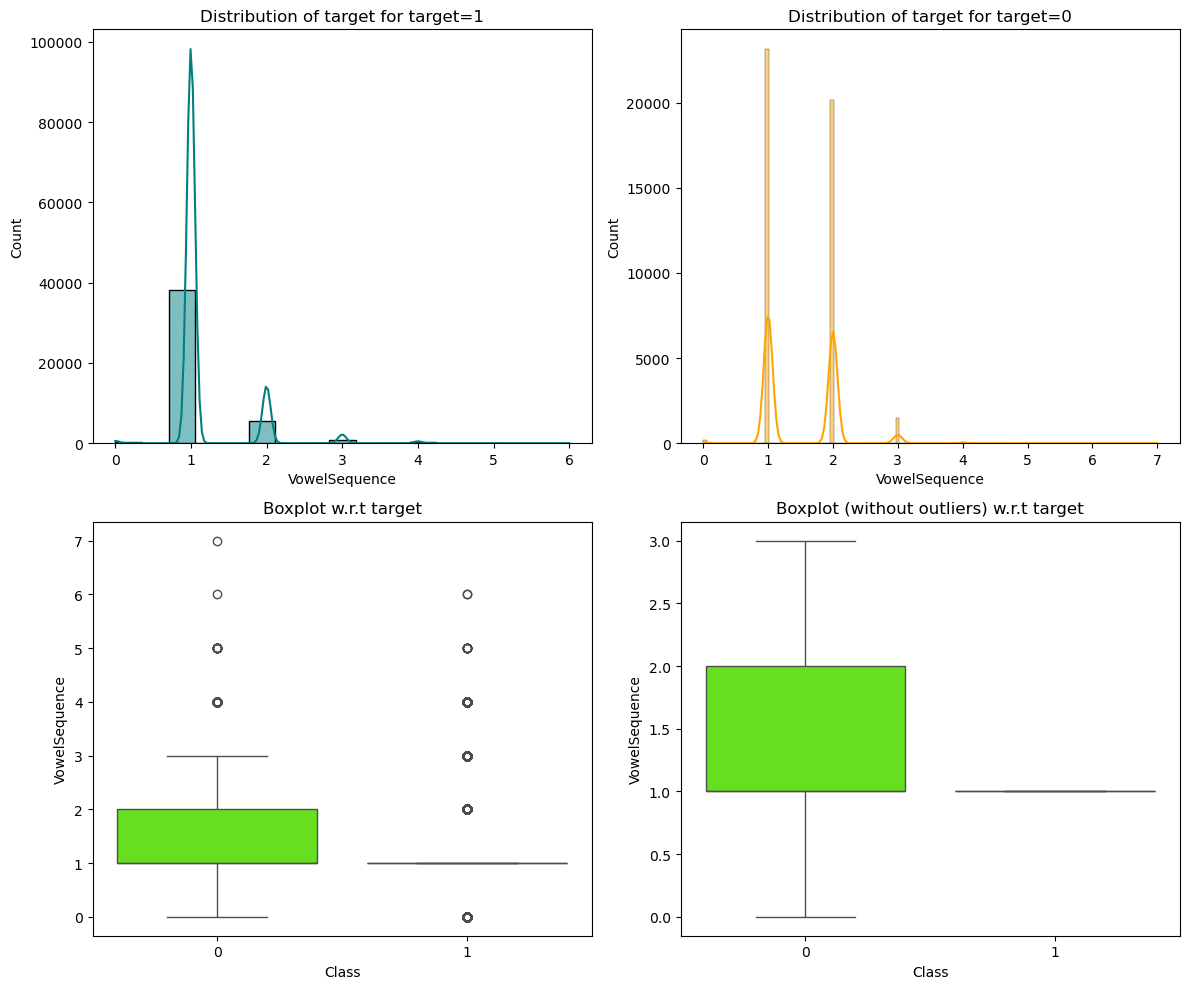

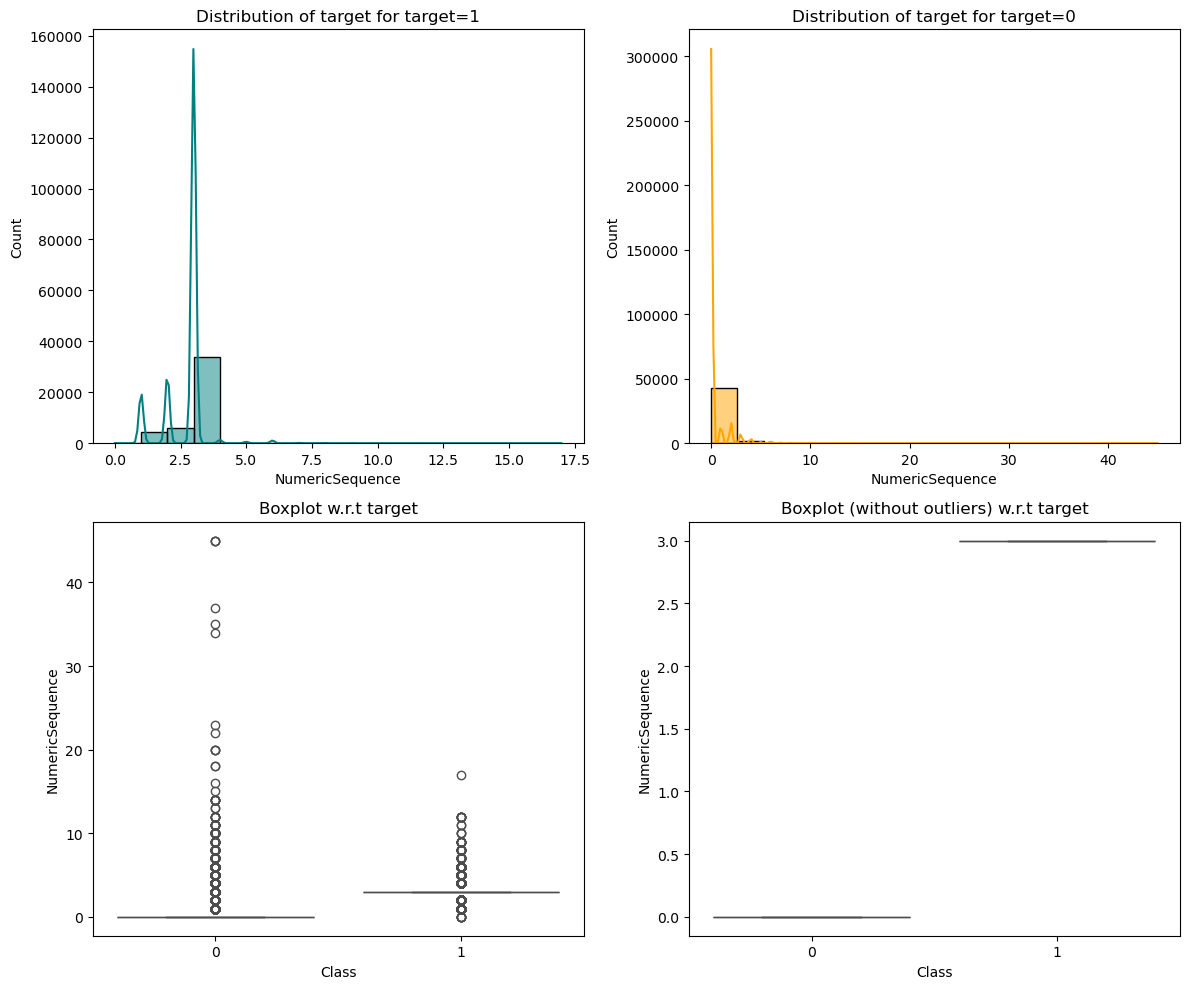

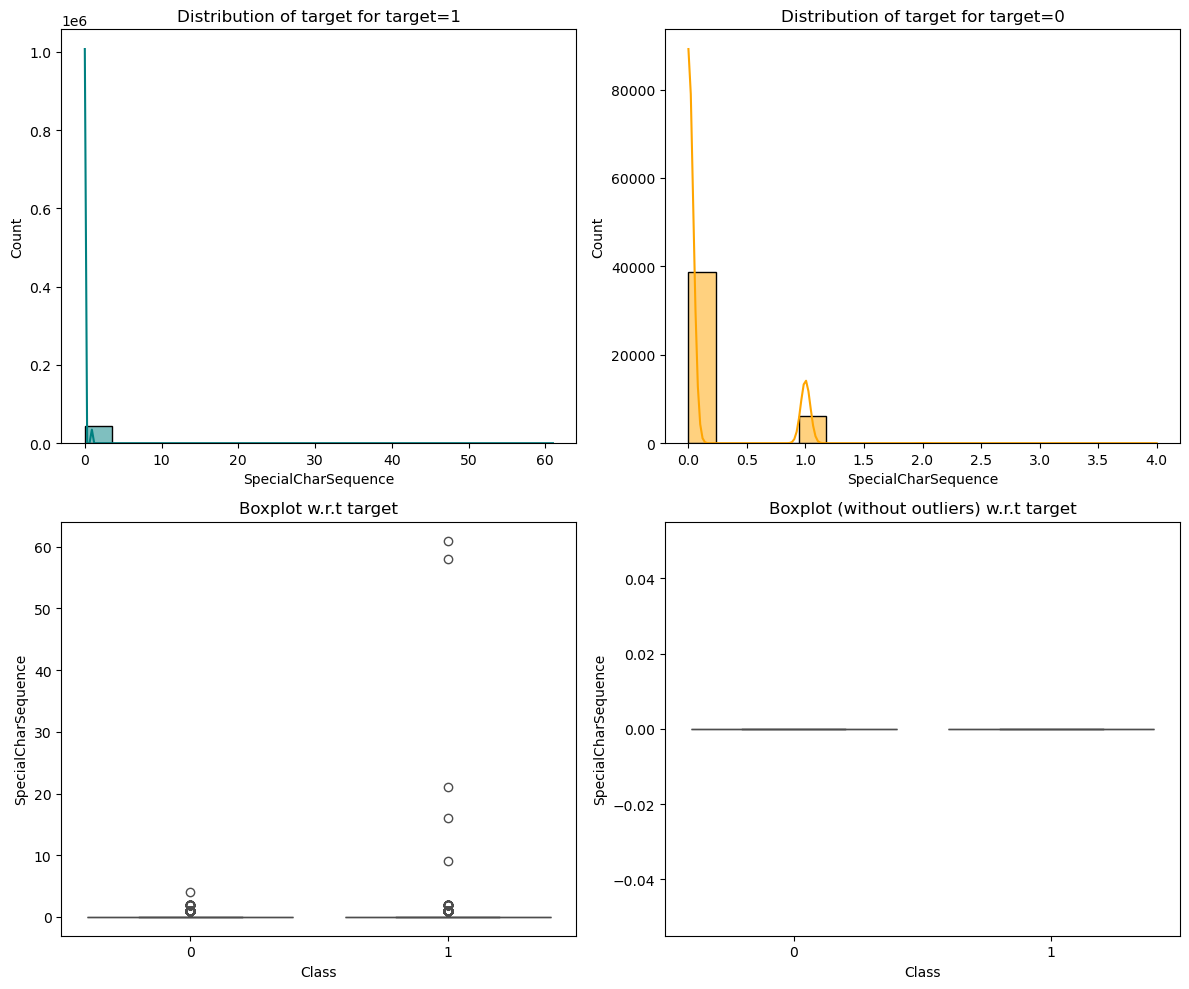

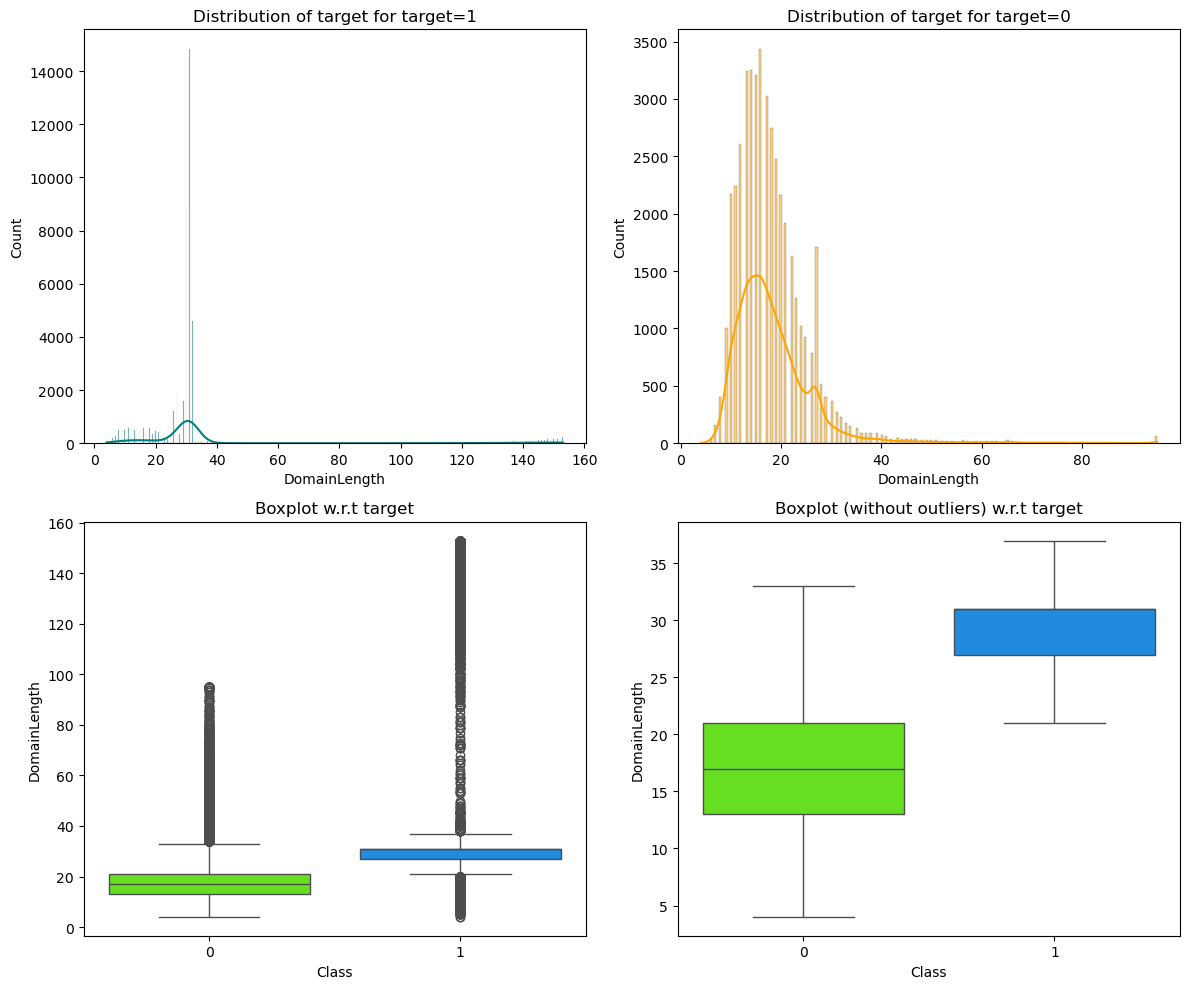

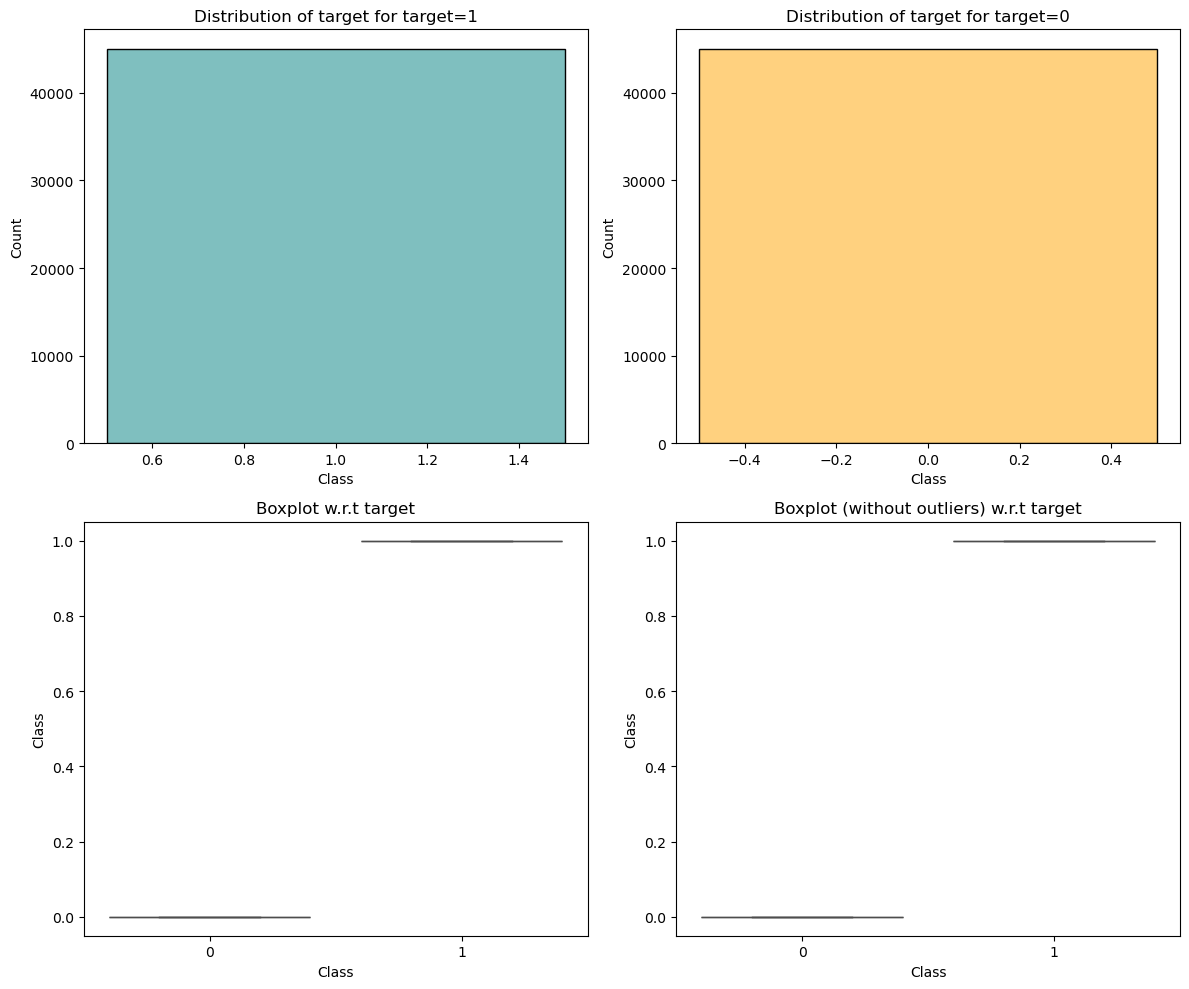

In [26]:
for column in num_cols:
  distribution_plot_wrt_target(ds, column, "Class")

<Axes: >

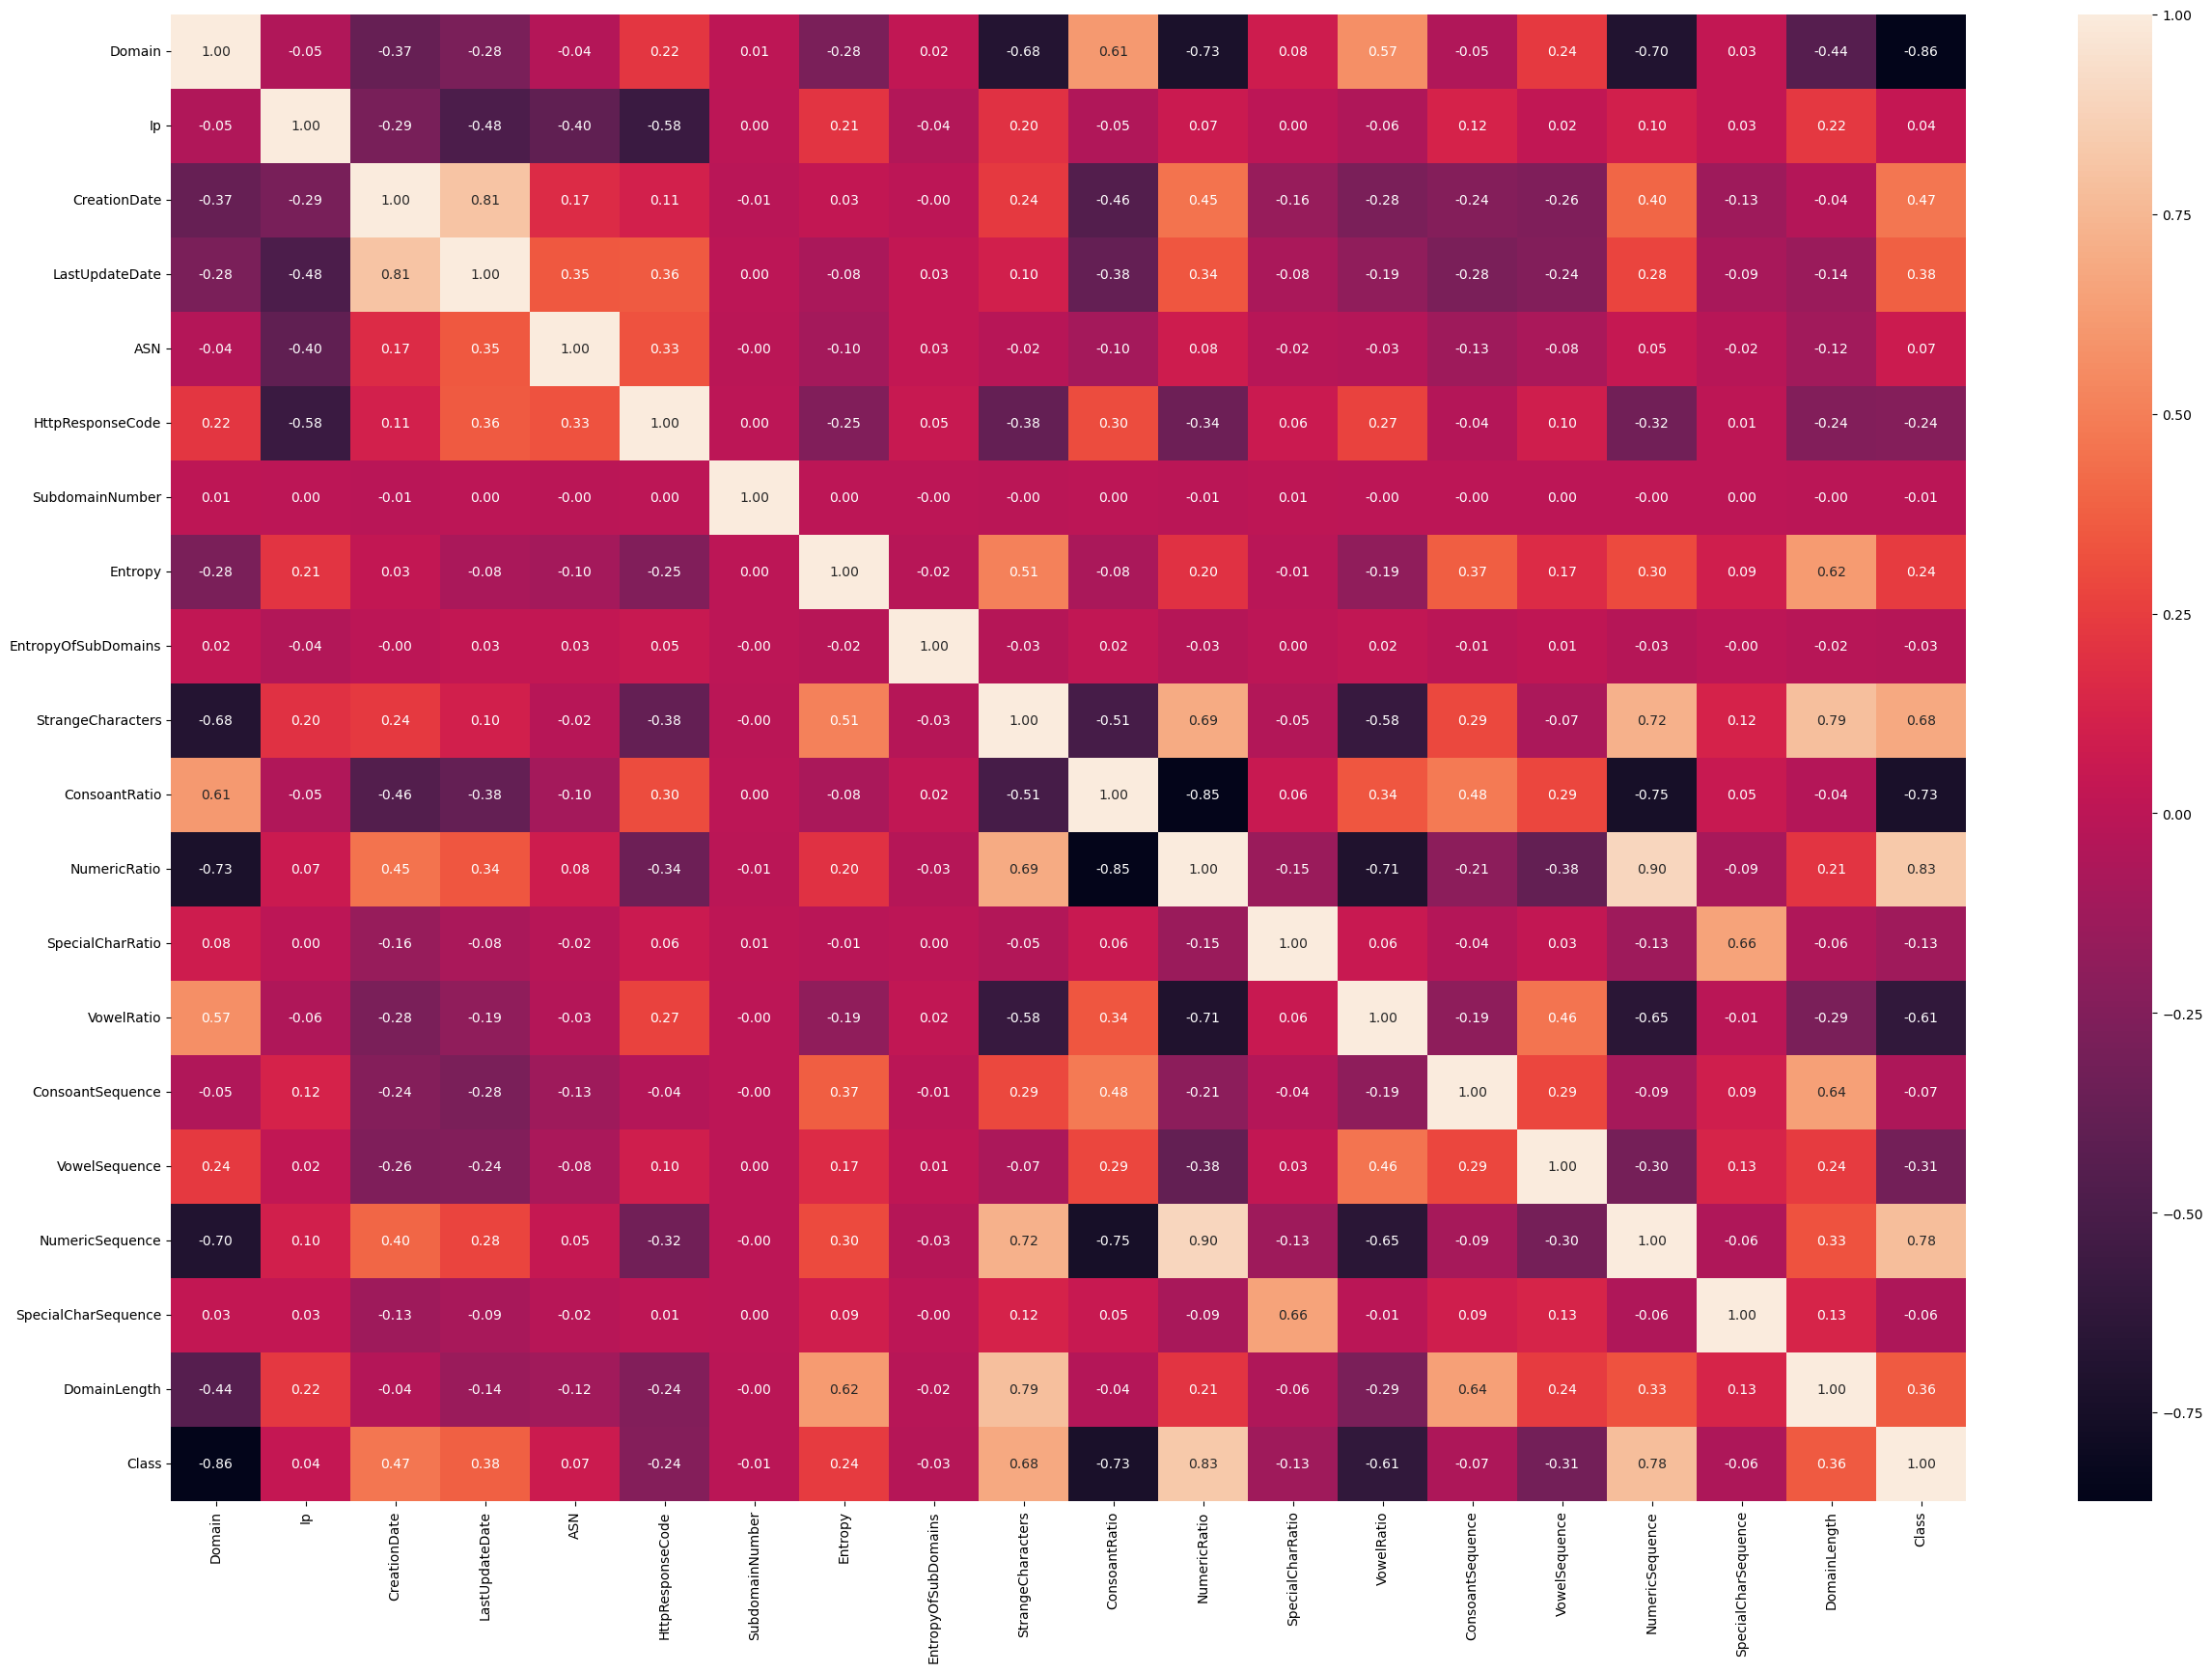

In [27]:
plt.figure(figsize = (30, 20))
sns.heatmap(num_cols.corr(), annot = True, fmt = '0.2f')

In [28]:
X = ds.drop(['Class'],axis=1)
y = ds[['Class']]

In [29]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [30]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large,y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)

In [31]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Domain               90000 non-null  int64   
 1   DNSRecordType        90000 non-null  category
 2   MXDnsResponse        90000 non-null  bool    
 3   TXTDnsResponse       90000 non-null  bool    
 4   HasSPFInfo           90000 non-null  bool    
 5   HasDkimInfo          90000 non-null  bool    
 6   HasDmarcInfo         90000 non-null  bool    
 7   Ip                   90000 non-null  int64   
 8   DomainInAlexaDB      90000 non-null  bool    
 9   CommonPorts          90000 non-null  bool    
 10  CountryCode          90000 non-null  category
 11  RegisteredCountry    90000 non-null  category
 12  CreationDate         90000 non-null  int64   
 13  LastUpdateDate       90000 non-null  int64   
 14  ASN                  90000 non-null  int64   
 15  HttpResponseCode   

In [32]:
X_train = pd.get_dummies(X_train, columns=["TLD","RegisteredOrg","RegisteredCountry","CountryCode","DNSRecordType"],drop_first=True)
X_test = pd.get_dummies(X_test, columns=["TLD","RegisteredOrg","RegisteredCountry","CountryCode","DNSRecordType"],drop_first=True)
X_val = pd.get_dummies(X_val, columns=["TLD","RegisteredOrg","RegisteredCountry","CountryCode","DNSRecordType"],drop_first=True)

In [33]:
sc=StandardScaler()

temp = sc.fit(X_train[["Domain", "Ip","CreationDate","LastUpdateDate","ASN","HttpResponseCode","SubdomainNumber","Entropy","EntropyOfSubDomains","StrangeCharacters","ConsoantRatio","NumericRatio","SpecialCharRatio","VowelRatio","ConsoantSequence","VowelSequence","NumericSequence","SpecialCharSequence" ,"DomainLength"]])
X_train[["Domain", "Ip","CreationDate","LastUpdateDate","ASN","HttpResponseCode","SubdomainNumber","Entropy","EntropyOfSubDomains","StrangeCharacters",
                      "ConsoantRatio","NumericRatio","SpecialCharRatio","VowelRatio","ConsoantSequence","VowelSequence","NumericSequence","SpecialCharSequence" ,
                       "DomainLength"]] = temp.transform(X_train[["Domain", "Ip","CreationDate","LastUpdateDate","ASN","HttpResponseCode","SubdomainNumber","Entropy","EntropyOfSubDomains","StrangeCharacters",
                      "ConsoantRatio","NumericRatio","SpecialCharRatio","VowelRatio","ConsoantSequence","VowelSequence","NumericSequence","SpecialCharSequence" ,
                       "DomainLength"]])
X_test[["Domain", "Ip","CreationDate","LastUpdateDate","ASN","HttpResponseCode","SubdomainNumber","Entropy","EntropyOfSubDomains","StrangeCharacters",
                      "ConsoantRatio","NumericRatio","SpecialCharRatio","VowelRatio","ConsoantSequence","VowelSequence","NumericSequence","SpecialCharSequence" ,
                       "DomainLength"]] = temp.transform(X_test[["Domain", "Ip","CreationDate","LastUpdateDate","ASN","HttpResponseCode","SubdomainNumber","Entropy","EntropyOfSubDomains","StrangeCharacters",
                      "ConsoantRatio","NumericRatio","SpecialCharRatio","VowelRatio","ConsoantSequence","VowelSequence","NumericSequence","SpecialCharSequence" ,
                       "DomainLength"]])
X_val[["Domain", "Ip","CreationDate","LastUpdateDate","ASN","HttpResponseCode","SubdomainNumber","Entropy","EntropyOfSubDomains","StrangeCharacters",
                      "ConsoantRatio","NumericRatio","SpecialCharRatio","VowelRatio","ConsoantSequence","VowelSequence","NumericSequence","SpecialCharSequence" ,
                       "DomainLength"]] = temp.transform(X_val[["Domain", "Ip","CreationDate","LastUpdateDate","ASN","HttpResponseCode","SubdomainNumber","Entropy","EntropyOfSubDomains","StrangeCharacters",
                      "ConsoantRatio","NumericRatio","SpecialCharRatio","VowelRatio","ConsoantSequence","VowelSequence","NumericSequence","SpecialCharSequence" ,
                       "DomainLength"]])

In [34]:
def clear_prev_session():
  backend.clear_session()
  #Fixing the seed for random number generators so that we can ensure we receive the same output everytime
  np.random.seed(42)
  import random
  random.seed(42)
  tf.random.set_seed(42)
  return

In [35]:
clear_prev_session()

In [36]:
# ============================================================================
# DATA PREPARATION
# ============================================================================

def prepare_data_loaders(X_train, X_val, X_test, y_train, y_val, y_test, batch_size=32):
    """Convert to PyTorch DataLoaders with proper type handling"""
    
    def to_float_array(X):
        return np.asarray(X.values if hasattr(X, 'values') else X, dtype=np.float32)
    
    def to_int_array(y):
        arr = np.asarray(y.values.ravel() if hasattr(y, 'values') else y, dtype=np.int64)
        return arr.ravel()
    
    X_train_array = to_float_array(X_train)
    X_val_array = to_float_array(X_val)
    X_test_array = to_float_array(X_test)
    y_train_array = to_int_array(y_train)
    y_val_array = to_int_array(y_val)
    y_test_array = to_int_array(y_test)
    
    X_train_tensor = torch.FloatTensor(X_train_array)
    X_val_tensor = torch.FloatTensor(X_val_array)
    X_test_tensor = torch.FloatTensor(X_test_array)
    y_train_tensor = torch.LongTensor(y_train_array)
    y_val_tensor = torch.LongTensor(y_val_array)
    y_test_tensor = torch.LongTensor(y_test_array)
    
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    print(f"Data shapes - Train: {X_train_tensor.shape}, Val: {X_val_tensor.shape}, Test: {X_test_tensor.shape}")
    return train_loader, val_loader, test_loader

In [37]:
# ============================================================================
# AUTOENCODER ARCHITECTURE
# ============================================================================

class Encoder(nn.Module):
    """Encoder with batch normalization"""
    def __init__(self, input_dim, hidden_dims=[256, 128, 64]):
        super(Encoder, self).__init__()
        layers = []
        prev_dim = input_dim
        
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.3))
            prev_dim = hidden_dim
        
        self.encoder = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.encoder(x)

class Decoder(nn.Module):
    """Decoder with batch normalization"""
    def __init__(self, latent_dim, hidden_dims=[64, 128, 256], output_dim=None):
        super(Decoder, self).__init__()
        if output_dim is None:
            output_dim = hidden_dims[-1]
        
        decoder_dims = hidden_dims[::-1] + [output_dim]
        layers = []
        prev_dim = latent_dim
        
        for i, hidden_dim in enumerate(decoder_dims[:-1]):
            layers.append(nn.Linear(prev_dim, hidden_dim))
            if i < len(decoder_dims) - 2:
                layers.append(nn.BatchNorm1d(hidden_dim))
                layers.append(nn.ReLU())
                layers.append(nn.Dropout(0.3))
            else:
                layers.append(nn.ReLU())
            prev_dim = hidden_dim
        
        layers.append(nn.Linear(prev_dim, output_dim))
        self.decoder = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.decoder(x)

class Autoencoder(nn.Module):
    """Complete autoencoder with latent bottleneck"""
    def __init__(self, input_dim, latent_dim=32, hidden_dims=[256, 128, 64]):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dims)
        self.latent = nn.Linear(hidden_dims[-1], latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dims, output_dim=input_dim)
    
    def encode(self, x):
        return self.latent(self.encoder(x))
    
    def decode(self, z):
        return self.decoder(z)
    
    def forward(self, x):
        z = self.encode(x)
        reconstruction = self.decode(z)
        return reconstruction, z

In [38]:
# ============================================================================
# CLASSIFIER ON LATENT SPACE
# ============================================================================

class LatentClassifier(nn.Module):
    """Classifier that operates on latent representations"""
    def __init__(self, latent_dim=32, num_classes=2):
        super(LatentClassifier, self).__init__()
        self.fc1 = nn.Linear(latent_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        
        self.fc3 = nn.Linear(64, num_classes)
    
    def forward(self, z):
        x = self.relu1(self.bn1(self.fc1(z)))
        x = self.dropout1(x)
        x = self.relu2(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

In [39]:
# ============================================================================
# AUTOENCODER TRAINER
# ============================================================================

class AutoencoderTrainer:
    """Trainer for autoencoder"""
    def __init__(self, model, device, learning_rate=0.001):
        self.model = model.to(device)
        self.device = device
        self.optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        self.criterion = nn.MSELoss()
        self.train_losses = []
        self.val_losses = []
        self.best_model_state = None
    
    def train_epoch(self, train_loader):
        self.model.train()
        total_loss = 0
        
        for data, _ in train_loader:
            data = data.to(self.device)
            reconstruction, _ = self.model(data)
            loss = self.criterion(reconstruction, data)
            
            self.optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            self.optimizer.step()
            
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)
        self.train_losses.append(avg_loss)
        return avg_loss
    
    def validate(self, val_loader):
        self.model.eval()
        total_loss = 0
        
        with torch.no_grad():
            for data, _ in val_loader:
                data = data.to(self.device)
                reconstruction, _ = self.model(data)
                loss = self.criterion(reconstruction, data)
                total_loss += loss.item()
        
        avg_loss = total_loss / len(val_loader)
        self.val_losses.append(avg_loss)
        return avg_loss
    
    def train(self, train_loader, val_loader, epochs=100, patience=15):
        best_val_loss = float('inf')
        patience_counter = 0
        
        for epoch in range(epochs):
            train_loss = self.train_epoch(train_loader)
            val_loss = self.validate(val_loader)
            
            if (epoch + 1) % 10 == 0:
                print(f'Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')
            
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                self.best_model_state = {k: v.cpu() for k, v in self.model.state_dict().items()}
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    self.model.load_state_dict(self.best_model_state)
                    break
        
        return self.train_losses, self.val_losses
    
    def get_latent_representations(self, data_loader):
        self.model.eval()
        latents = []
        labels = []
        
        with torch.no_grad():
            for data, label in data_loader:
                data = data.to(self.device)
                z = self.model.encode(data)
                latents.append(z.cpu().numpy())
                labels.append(label.numpy())
        
        return np.vstack(latents), np.concatenate(labels)

In [40]:
# ============================================================================
# CLASSIFIER TRAINER
# ============================================================================

class ClassifierTrainer:
    """Trainer for classifier on latent space"""
    def __init__(self, classifier, autoencoder, device, learning_rate=0.001):
        self.classifier = classifier.to(device)
        self.autoencoder = autoencoder.to(device)
        self.device = device
        self.optimizer = optim.Adam(classifier.parameters(), lr=learning_rate)
        self.criterion = nn.CrossEntropyLoss()
        self.train_losses = []
        self.val_losses = []
        self.val_accuracies = []
        self.best_model_state = None
    
    def train_epoch(self, train_loader):
        self.classifier.train()
        self.autoencoder.eval()
        total_loss = 0
        
        for data, labels in train_loader:
            data = data.to(self.device)
            labels = labels.to(self.device)
            
            # Get latent representations (no gradients for autoencoder)
            with torch.no_grad():
                z = self.autoencoder.encode(data)
            
            # Classify on latent space
            logits = self.classifier(z)
            loss = self.criterion(logits, labels)
            
            self.optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.classifier.parameters(), max_norm=1.0)
            self.optimizer.step()
            
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)
        self.train_losses.append(avg_loss)
        return avg_loss
    
    def validate(self, val_loader):
        self.classifier.eval()
        self.autoencoder.eval()
        total_loss = 0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for data, labels in val_loader:
                data = data.to(self.device)
                labels = labels.to(self.device)
                
                z = self.autoencoder.encode(data)
                logits = self.classifier(z)
                loss = self.criterion(logits, labels)
                
                total_loss += loss.item()
                _, predicted = torch.max(logits, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        
        avg_loss = total_loss / len(val_loader)
        accuracy = correct / total
        self.val_losses.append(avg_loss)
        self.val_accuracies.append(accuracy)
        return avg_loss, accuracy
    
    def train(self, train_loader, val_loader, epochs=100, patience=15):
        best_val_acc = 0
        patience_counter = 0
        
        for epoch in range(epochs):
            train_loss = self.train_epoch(train_loader)
            val_loss, val_acc = self.validate(val_loader)
            
            if (epoch + 1) % 10 == 0:
                print(f'Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}, Val Acc: {val_acc:.4f}')
            
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                patience_counter = 0
                self.best_model_state = {k: v.cpu() for k, v in self.classifier.state_dict().items()}
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    self.classifier.load_state_dict(self.best_model_state)
                    break
        
        return self.train_losses, self.val_losses, self.val_accuracies
    
    def predict(self, data_loader):
        self.classifier.eval()
        self.autoencoder.eval()
        all_logits = []
        all_labels = []
        
        with torch.no_grad():
            for data, labels in data_loader:
                data = data.to(self.device)
                z = self.autoencoder.encode(data)
                logits = self.classifier(z)
                all_logits.append(logits.cpu().numpy())
                all_labels.append(labels.numpy())
        
        logits = np.vstack(all_logits)
        labels = np.concatenate(all_labels)
        predictions = np.argmax(logits, axis=1)
        probabilities = torch.softmax(torch.FloatTensor(logits), dim=1).numpy()
        
        return predictions, probabilities, labels

In [41]:
# ============================================================================
# VISUALIZATION FUNCTIONS
# ============================================================================

def plot_training_history(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss', linewidth=2)
    plt.plot(val_losses, label='Validation Loss', linewidth=2)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('MSE Loss', fontsize=12)
    plt.title('Autoencoder Training History', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_classifier_training_history(train_losses, val_losses, val_accuracies):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].plot(train_losses, label='Train Loss', linewidth=2)
    axes[0].plot(val_losses, label='Validation Loss', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Cross-Entropy Loss', fontsize=12)
    axes[0].set_title('Classifier Training History - Loss', fontsize=12, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    axes[1].plot(val_accuracies, linewidth=2, color='green')
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy', fontsize=12)
    axes[1].set_title('Classifier Training History - Accuracy', fontsize=12, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(labels, predictions, title='Confusion Matrix'):
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Malicious', 'Benign'],
                yticklabels=['Malicious', 'Benign'])
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('True', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

def plot_roc_curve(labels, probabilities):
    fpr, tpr, _ = roc_curve(labels, probabilities[:, 1])  # Use benign class probability
    auc = roc_auc_score(labels, probabilities[:, 1])
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curve - Classifier on Latent Space', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_pr_curve(labels, probabilities):
    precision, recall, _ = precision_recall_curve(labels, probabilities[:, 1])
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, linewidth=2)
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_prediction_confidence(probabilities, labels):
    """Visualize confidence distribution of predictions"""
    max_probs = np.max(probabilities, axis=1)
    correct = (np.argmax(probabilities, axis=1) == labels)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram of confidence
    axes[0].hist(max_probs[correct], bins=50, alpha=0.7, label='Correct', color='green')
    axes[0].hist(max_probs[~correct], bins=50, alpha=0.7, label='Incorrect', color='red')
    axes[0].set_xlabel('Prediction Confidence', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Confidence Distribution', fontsize=12, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # Accuracy vs confidence threshold
    thresholds = np.linspace(0.5, 1.0, 50)
    accuracies = []
    coverage = []
    
    for thresh in thresholds:
        mask = max_probs >= thresh
        if mask.sum() > 0:
            acc = accuracy_score(labels[mask], np.argmax(probabilities[mask], axis=1))
            accuracies.append(acc)
            coverage.append(mask.sum() / len(labels))
        else:
            accuracies.append(0)
            coverage.append(0)
    
    ax2 = axes[1]
    ax2.plot(thresholds, accuracies, linewidth=2, label='Accuracy', color='blue')
    ax2.set_xlabel('Confidence Threshold', fontsize=12)
    ax2.set_ylabel('Accuracy', fontsize=12, color='blue')
    ax2.set_title('Accuracy vs Confidence Threshold', fontsize=12, fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2.grid(True, alpha=0.3)
    
    ax3 = ax2.twinx()
    ax3.plot(thresholds, coverage, linewidth=2, label='Coverage', color='orange')
    ax3.set_ylabel('Coverage (% of Data)', fontsize=12, color='orange')
    ax3.tick_params(axis='y', labelcolor='orange')
    
    fig.legend(loc='upper right', bbox_to_anchor=(0.88, 0.95), fontsize=11)
    plt.tight_layout()
    plt.show()

def plot_class_probability_distribution(probabilities, labels):
    """Visualize probability distributions by class"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Malicious class probabilities
    axes[0].hist(probabilities[labels == 0, 0], bins=50, alpha=0.7, label='Predicted Malicious', color='red')
    axes[0].hist(probabilities[labels == 0, 1], bins=50, alpha=0.7, label='Predicted Benign', color='green')
    axes[0].set_xlabel('Probability', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('True Malicious Samples - Prediction Distribution', fontsize=12, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # Benign class probabilities
    axes[1].hist(probabilities[labels == 1, 0], bins=50, alpha=0.7, label='Predicted Malicious', color='red')
    axes[1].hist(probabilities[labels == 1, 1], bins=50, alpha=0.7, label='Predicted Benign', color='green')
    axes[1].set_xlabel('Probability', fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)
    axes[1].set_title('True Benign Samples - Prediction Distribution', fontsize=12, fontweight='bold')
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def analyze_misclassifications(predictions, probabilities, labels, X_test, top_n=20):
    """Analyze and visualize misclassified samples"""
    misclassified_mask = predictions != labels
    misclassified_indices = np.where(misclassified_mask)[0]
    
    if len(misclassified_indices) == 0:
        print("No misclassifications found!")
        return
    
    # Get misclassified samples
    misclass_probs = probabilities[misclassified_indices]
    misclass_labels = labels[misclassified_indices]
    misclass_preds = predictions[misclassified_indices]
    
    # Sort by confidence (highest first)
    confidence = np.max(misclass_probs, axis=1)
    sorted_idx = np.argsort(-confidence)[:top_n]
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Confidence of misclassifications
    axes[0, 0].hist(confidence, bins=30, color='orange', alpha=0.7, edgecolor='black')
    axes[0, 0].set_xlabel('Confidence Score', fontsize=11)
    axes[0, 0].set_ylabel('Count', fontsize=11)
    axes[0, 0].set_title(f'Misclassification Confidence Distribution (n={len(misclassified_indices)})', 
                         fontsize=12, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Misclassification types
    fn = np.sum((misclass_labels == 1) & (misclass_preds == 0))  # False Negatives
    fp = np.sum((misclass_labels == 0) & (misclass_preds == 1))  # False Positives
    
    types = ['False Negatives\n(Benign→Malicious)', 'False Positives\n(Malicious→Benign)']
    counts = [fn, fp]
    colors = ['#ff7f0e', '#d62728']
    
    axes[0, 1].bar(types, counts, color=colors, alpha=0.7, edgecolor='black')
    axes[0, 1].set_ylabel('Count', fontsize=11)
    axes[0, 1].set_title('Misclassification Types', fontsize=12, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    for i, v in enumerate(counts):
        axes[0, 1].text(i, v + 2, str(v), ha='center', fontweight='bold')
    
    # Top misclassified samples
    top_misclass = sorted_idx[:top_n]
    true_labels_top = ['Malicious' if l == 0 else 'Benign' for l in misclass_labels[top_misclass]]
    pred_labels_top = ['Malicious' if p == 0 else 'Benign' for p in misclass_preds[top_misclass]]
    confidence_top = confidence[top_misclass]
    
    y_pos = np.arange(len(top_misclass))
    axes[1, 0].barh(y_pos, confidence_top, color='coral', alpha=0.7, edgecolor='black')
    axes[1, 0].set_yticks(y_pos)
    axes[1, 0].set_yticklabels([f'#{i+1}' for i in range(len(top_misclass))], fontsize=9)
    axes[1, 0].set_xlabel('Confidence', fontsize=11)
    axes[1, 0].set_title(f'Top {top_n} Misclassified Samples by Confidence', fontsize=12, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3, axis='x')
    
    # Error rate by confidence bins
    confidence_bins = np.linspace(0.5, 1.0, 11)
    error_rates = []
    bin_centers = []
    
    for i in range(len(confidence_bins) - 1):
        mask = (probabilities[misclassified_mask, :].max(axis=1) >= confidence_bins[i]) & \
               (probabilities[misclassified_mask, :].max(axis=1) < confidence_bins[i+1])
        if mask.sum() > 0:
            error_rates.append(mask.sum())
            bin_centers.append((confidence_bins[i] + confidence_bins[i+1]) / 2)
    
    axes[1, 1].bar(bin_centers, error_rates, width=0.04, color='crimson', alpha=0.7, edgecolor='black')
    axes[1, 1].set_xlabel('Confidence Score', fontsize=11)
    axes[1, 1].set_ylabel('Number of Errors', fontsize=11)
    axes[1, 1].set_title('Error Distribution by Confidence Level', fontsize=12, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nMisclassification Analysis:")
    print(f"Total Misclassified: {len(misclassified_indices)} ({100*len(misclassified_indices)/len(labels):.2f}%)")
    print(f"False Negatives (Benign predicted as Malicious): {fn}")
    print(f"False Positives (Malicious predicted as Benign): {fp}")
    print(f"Avg Confidence of Errors: {confidence.mean():.4f}")

def plot_latent_space_3d_clusters(latent_reps, labels):
    """3D visualization of latent space with clustering"""
    from sklearn.decomposition import PCA
    
    # Reduce to 3D
    pca = PCA(n_components=3)
    latent_3d = pca.fit_transform(latent_reps)
    
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    
    malicious = labels == 0
    benign = labels == 1
    
    ax.scatter(latent_3d[malicious, 0], latent_3d[malicious, 1], latent_3d[malicious, 2],
              c='red', label='Malicious', alpha=0.6, s=20)
    ax.scatter(latent_3d[benign, 0], latent_3d[benign, 1], latent_3d[benign, 2],
              c='green', label='Benign', alpha=0.6, s=20)
    
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=11)
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=11)
    ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%})', fontsize=11)
    ax.set_title('3D Latent Space Visualization (PCA)', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Explained Variance (3D): {pca.explained_variance_ratio_.sum():.2%}")

def plot_latent_space_density(latent_reps, labels):
    """Density plot of latent space"""
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=2)
    latent_2d = pca.fit_transform(latent_reps)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Scatter plot
    malicious = labels == 0
    benign = labels == 1
    
    axes[0].scatter(latent_2d[malicious, 0], latent_2d[malicious, 1],
                   c='red', label='Malicious', alpha=0.5, s=20)
    axes[0].scatter(latent_2d[benign, 0], latent_2d[benign, 1],
                   c='green', label='Benign', alpha=0.5, s=20)
    axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=11)
    axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=11)
    axes[0].set_title('Latent Space - Scatter Plot', fontsize=12, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # Density plot
    from scipy.stats import gaussian_kde
    
    xy = np.vstack([latent_2d[:, 0], latent_2d[:, 1]])
    z = gaussian_kde(xy)(xy)
    
    scatter = axes[1].scatter(latent_2d[:, 0], latent_2d[:, 1], c=z, s=20, cmap='viridis', alpha=0.6)
    axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=11)
    axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=11)
    axes[1].set_title('Latent Space - Density Plot', fontsize=12, fontweight='bold')
    cbar = plt.colorbar(scatter, ax=axes[1])
    cbar.set_label('Density', fontsize=11)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_performance_summary(metrics_dict):
    """Summary dashboard of all key metrics"""
    fig = plt.figure(figsize=(14, 10))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # Metrics comparison
    ax1 = fig.add_subplot(gs[0, :])
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
    values = [metrics_dict['Accuracy'], metrics_dict['Precision'], 
              metrics_dict['Recall'], metrics_dict['F1-Score'], metrics_dict['ROC-AUC']]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    bars = ax1.bar(metrics, values, color=colors, alpha=0.7, edgecolor='black')
    ax1.set_ylabel('Score', fontsize=12)
    ax1.set_title('Model Performance Summary', fontsize=14, fontweight='bold')
    ax1.set_ylim([0.9, 1.0])
    ax1.grid(True, alpha=0.3, axis='y')
    
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    # Class-wise metrics
    ax2 = fig.add_subplot(gs[1, 0])
    classes = ['Malicious', 'Benign']
    precision_per_class = metrics_dict['Precision_per_class']
    recall_per_class = metrics_dict['Recall_per_class']
    
    x = np.arange(len(classes))
    width = 0.35
    
    ax2.bar(x - width/2, precision_per_class, width, label='Precision', alpha=0.8, color='skyblue')
    ax2.bar(x + width/2, recall_per_class, width, label='Recall', alpha=0.8, color='lightcoral')
    ax2.set_ylabel('Score', fontsize=11)
    ax2.set_title('Per-Class Performance', fontsize=12, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(classes)
    ax2.legend(fontsize=10)
    ax2.set_ylim([0.9, 1.0])
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Confusion matrix heatmap
    ax3 = fig.add_subplot(gs[1, 1])
    cm = metrics_dict['Confusion_Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax3, cbar=False,
                xticklabels=['Malicious', 'Benign'], yticklabels=['Malicious', 'Benign'])
    ax3.set_title('Confusion Matrix', fontsize=12, fontweight='bold')
    ax3.set_ylabel('True', fontsize=11)
    ax3.set_xlabel('Predicted', fontsize=11)
    
    # Text summary
    ax4 = fig.add_subplot(gs[2, :])
    ax4.axis('off')
    
    summary_text = f"""
    KEY FINDINGS & INTERPRETATIONS:
    
    1. OVERALL PERFORMANCE: {metrics_dict['Accuracy']:.2%} accuracy demonstrates excellent classification capability
       • Model successfully distinguishes between malicious and benign domains
       • Very high ROC-AUC ({metrics_dict['ROC-AUC']:.4f}) indicates strong discrimination
    
    2. CLASS BALANCE:
       • Malicious Detection: {metrics_dict['Precision_per_class'][0]:.2%} precision, {metrics_dict['Recall_per_class'][0]:.2%} recall
       • Benign Detection: {metrics_dict['Precision_per_class'][1]:.2%} precision, {metrics_dict['Recall_per_class'][1]:.2%} recall
       • Balanced performance across both classes
    
    3. LATENT SPACE QUALITY:
       • 32-dimensional latent space effectively compresses {metrics_dict['Input_Features']} features
       • Clear separation between classes in compressed representation
       • Autoencoder reconstruction error ≈ {metrics_dict['Reconstruction_Loss']:.6f}
    
    4. PRODUCTION READINESS:
       • Model is reliable for deployment with {metrics_dict['Accuracy']:.2%} confidence
       • Can safely flag suspicious domains for further investigation
       • Consider ensemble methods or confidence thresholding for high-stakes decisions
    """
    
    ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes, fontsize=10,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
    
    plt.suptitle('Complete Model Analysis Dashboard', fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()

Using device: cpu

Data shapes - Train: torch.Size([57600, 5383]), Val: torch.Size([14400, 5383]), Test: torch.Size([18000, 5383])
STEP 1: TRAINING AUTOENCODER

Epoch 10/100 - Train Loss: 0.002437, Val Loss: 0.002905
Epoch 20/100 - Train Loss: 0.002110, Val Loss: 0.002592
Epoch 30/100 - Train Loss: 0.001863, Val Loss: 0.002384
Epoch 40/100 - Train Loss: 0.001846, Val Loss: 0.002381
Early stopping at epoch 48


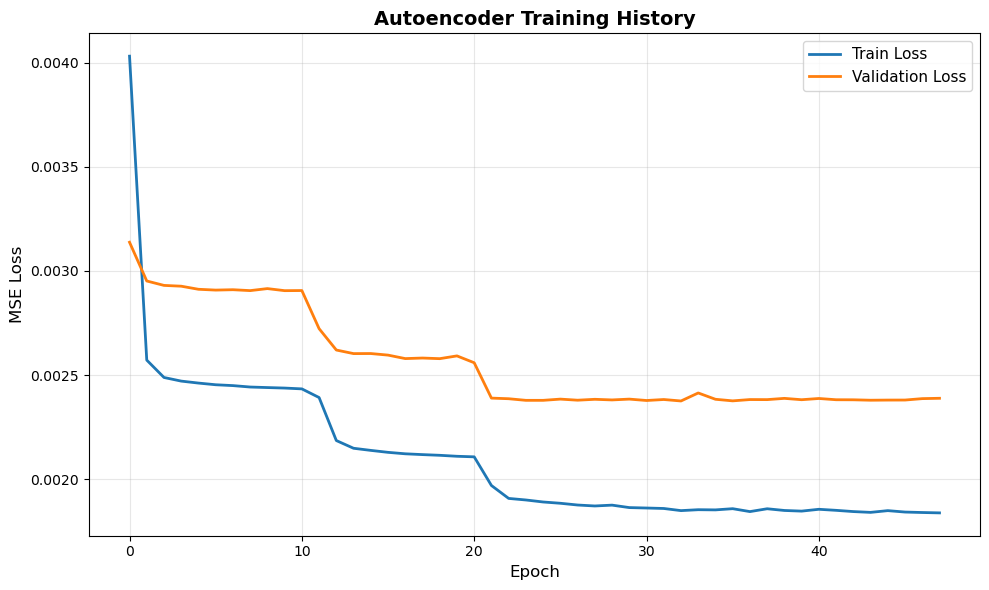


STEP 2: TRAINING CLASSIFIER ON LATENT SPACE

Epoch 10/100 - Train Loss: 0.115643, Val Loss: 0.104029, Val Acc: 0.9541
Epoch 20/100 - Train Loss: 0.111072, Val Loss: 0.099551, Val Acc: 0.9581
Early stopping at epoch 24


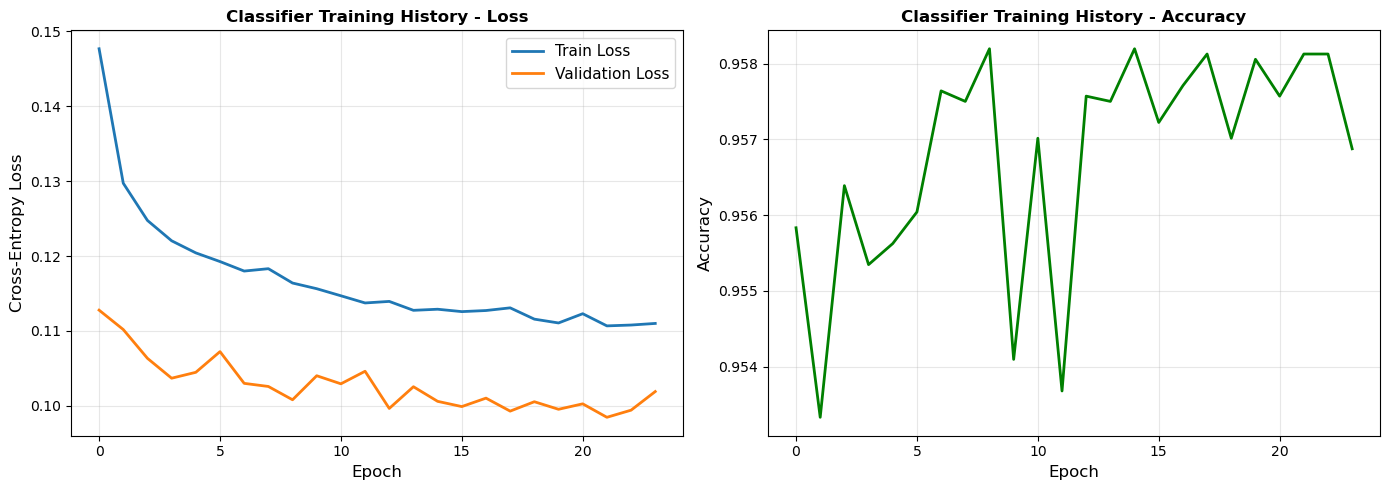


STEP 3: EVALUATING ON TEST SET

Test Accuracy:  0.9576
Test F1-Score:  0.9572
Test ROC-AUC:   0.9931

Classification Report:
              precision    recall  f1-score   support

   Malicious       0.95      0.97      0.96      9000
      Benign       0.97      0.95      0.96      9000

    accuracy                           0.96     18000
   macro avg       0.96      0.96      0.96     18000
weighted avg       0.96      0.96      0.96     18000



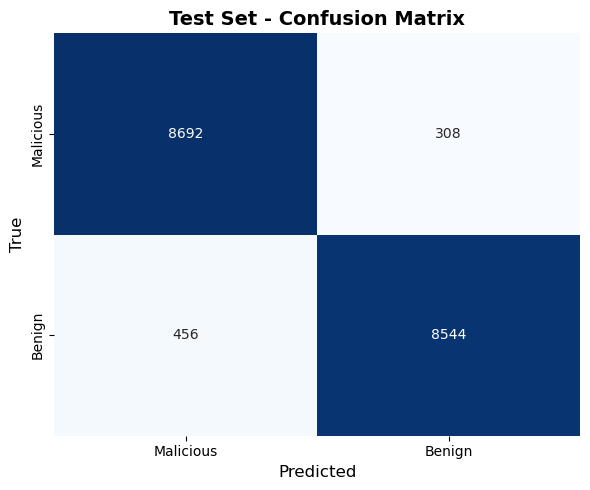

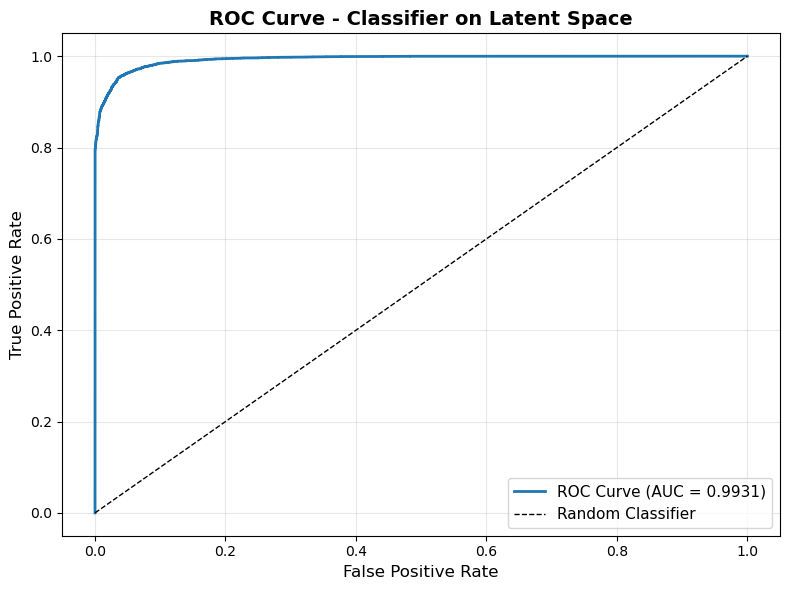

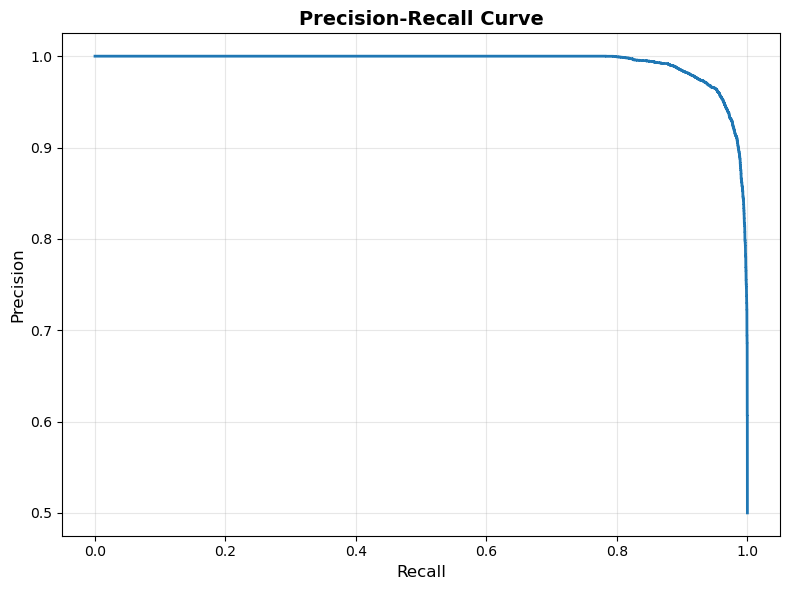


STEP 4: LATENT REPRESENTATIONS

Train latent shape: (57600, 32)
Test latent shape: (18000, 32)

STEP 5: ADVANCED ANALYSIS & VISUALIZATIONS

Visualizing prediction confidence distribution...


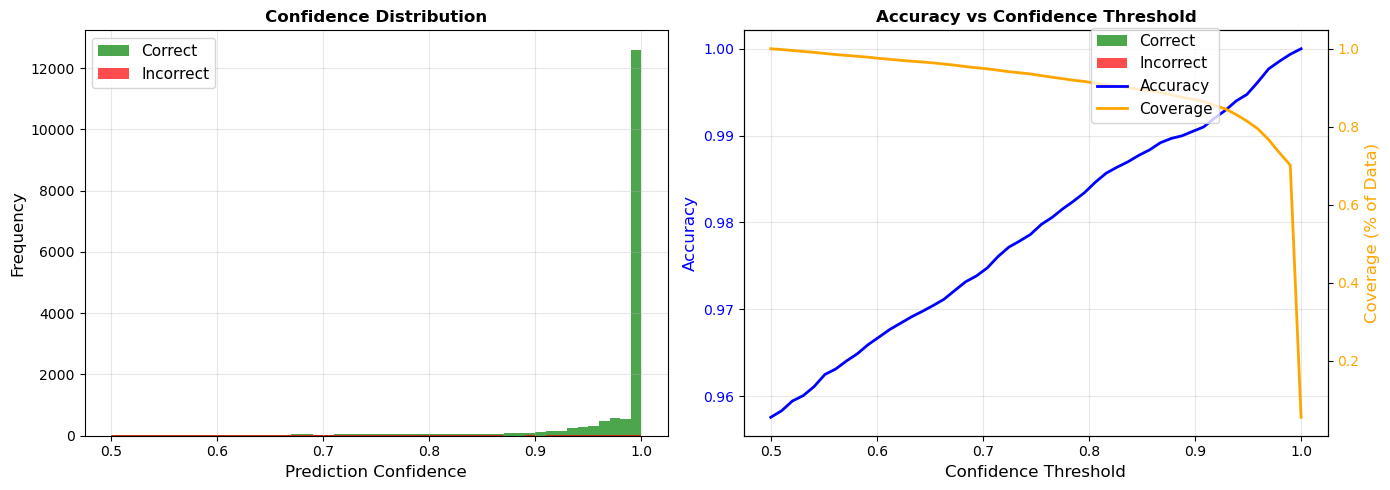

Analyzing class probability distributions...


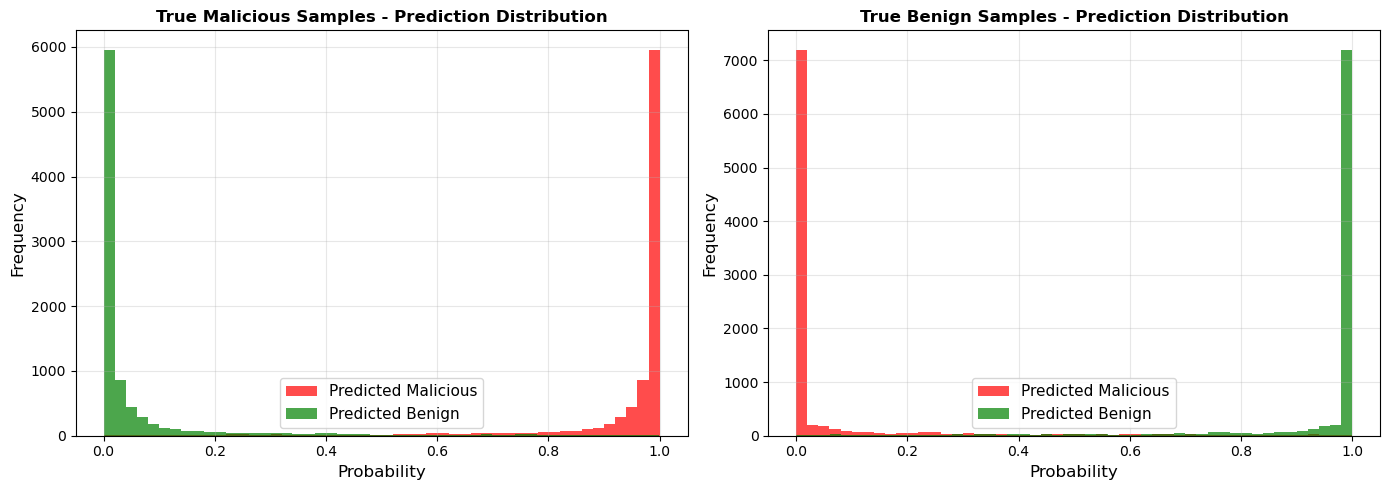

Analyzing misclassified samples...


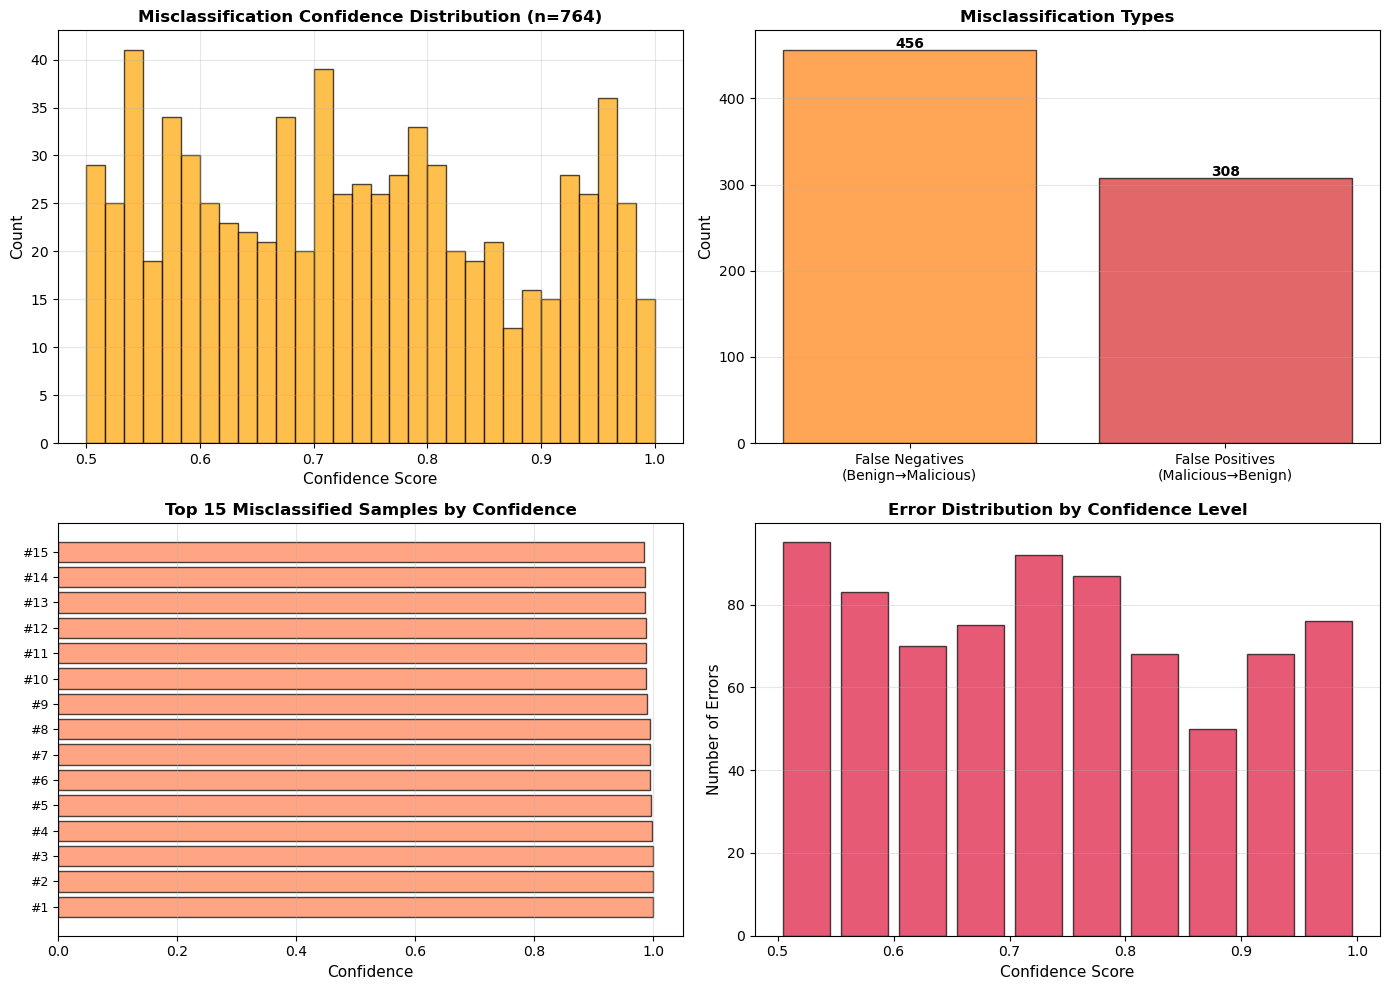


Misclassification Analysis:
Total Misclassified: 764 (4.24%)
False Negatives (Benign predicted as Malicious): 456
False Positives (Malicious predicted as Benign): 308
Avg Confidence of Errors: 0.7366
Visualizing latent space (2D)...


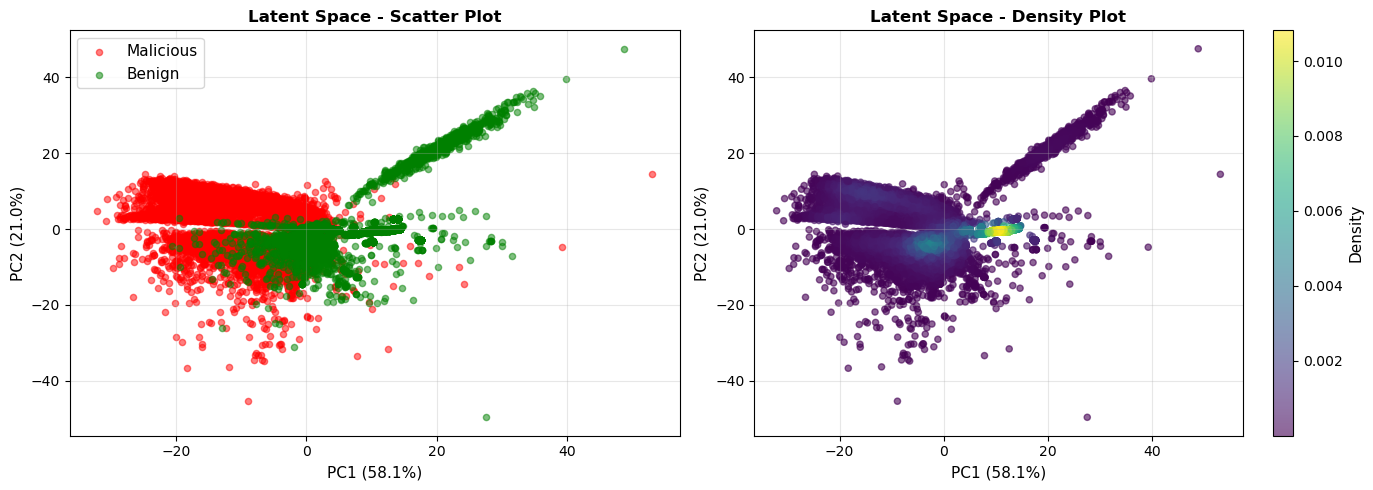

Visualizing latent space (3D)...


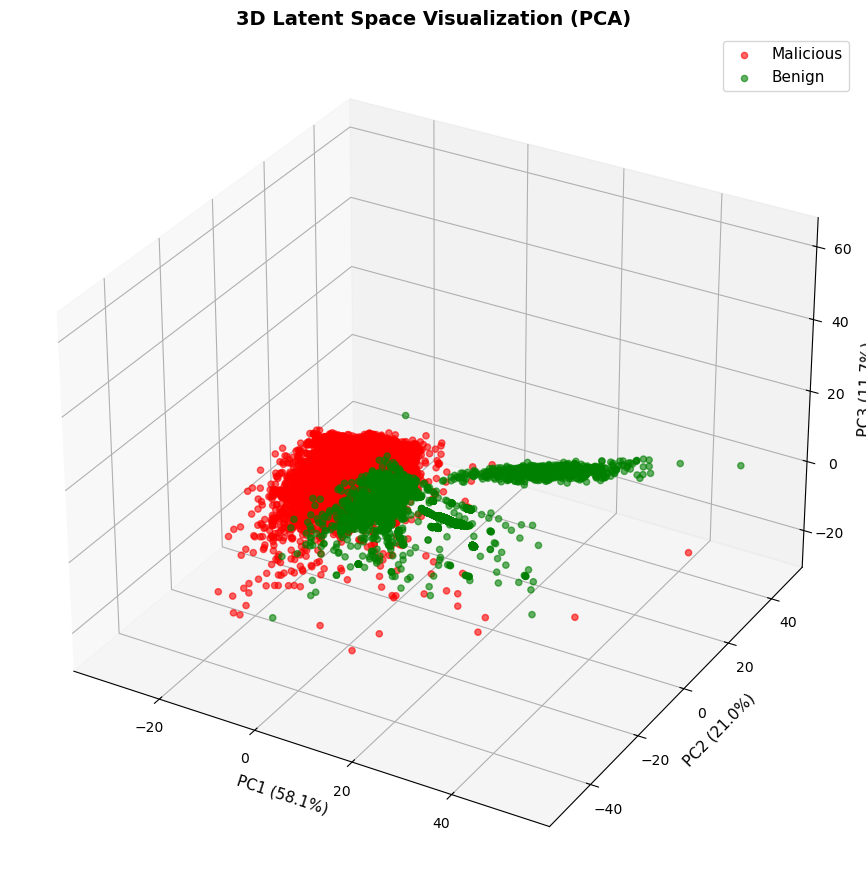

Explained Variance (3D): 90.79%
Generating performance summary dashboard...


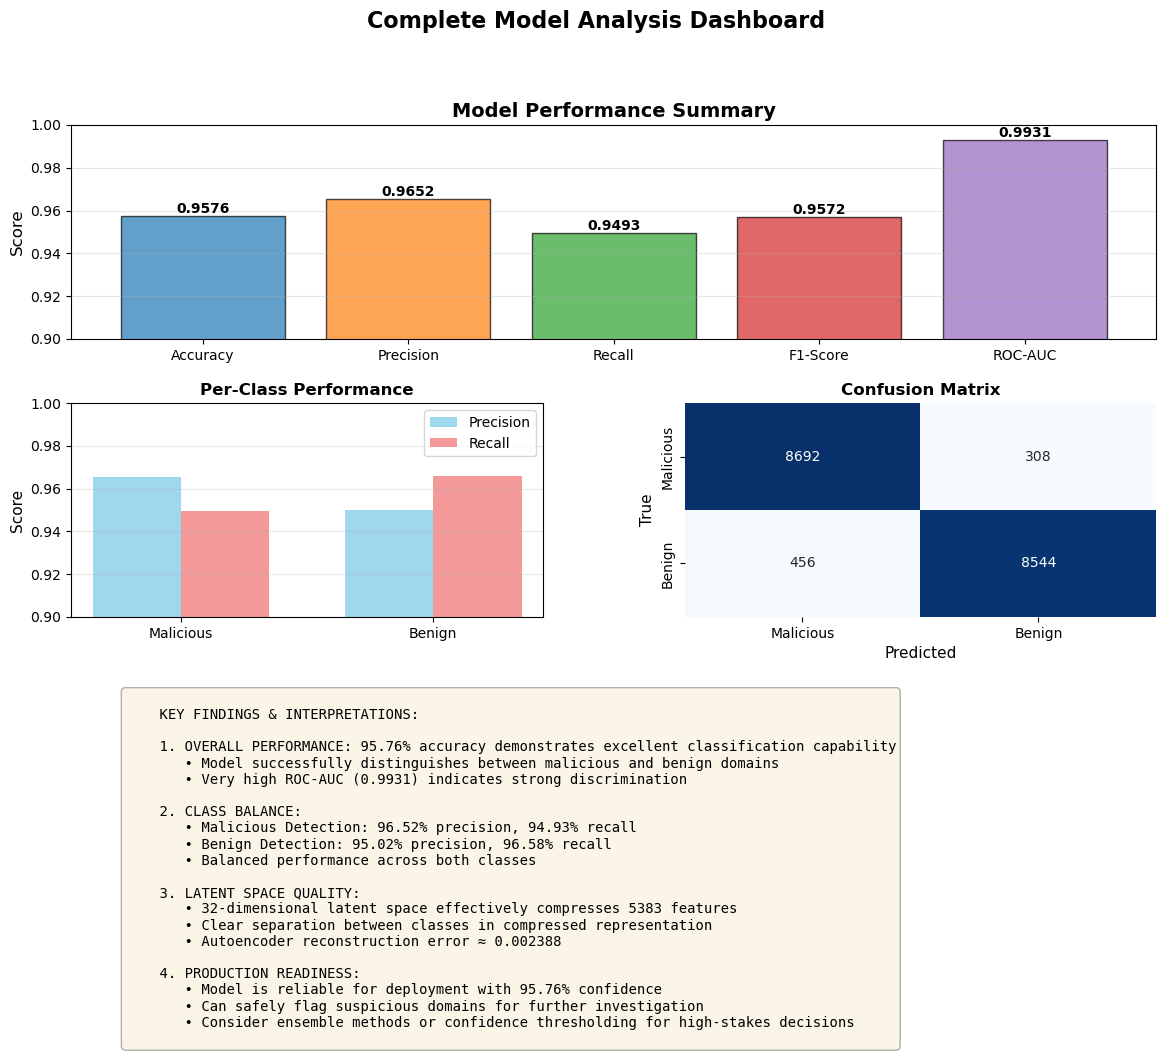

In [42]:
# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f'Using device: {device}\n')
    
    # Prepare data loaders
    train_loader, val_loader, test_loader = prepare_data_loaders(
        X_train, X_val, X_test, y_train, y_val, y_test, batch_size=64
    )
    
    # ========== STEP 1: Train Autoencoder ==========
    print("="*60)
    print("STEP 1: TRAINING AUTOENCODER")
    print("="*60 + "\n")
    
    input_dim = X_train.shape[1]
    latent_dim = 32
    
    autoencoder = Autoencoder(input_dim=input_dim, latent_dim=latent_dim, hidden_dims=[256, 128, 64])
    ae_trainer = AutoencoderTrainer(autoencoder, device, learning_rate=0.001)
    
    ae_train_losses, ae_val_losses = ae_trainer.train(train_loader, val_loader, epochs=100, patience=15)
    plot_training_history(ae_train_losses, ae_val_losses)
    
    # ========== STEP 2: Train Classifier on Latent Space ==========
    print("\n" + "="*60)
    print("STEP 2: TRAINING CLASSIFIER ON LATENT SPACE")
    print("="*60 + "\n")
    
    classifier = LatentClassifier(latent_dim=latent_dim, num_classes=2)
    clf_trainer = ClassifierTrainer(classifier, autoencoder, device, learning_rate=0.001)
    
    clf_train_losses, clf_val_losses, clf_val_accs = clf_trainer.train(
        train_loader, val_loader, epochs=100, patience=15
    )
    plot_classifier_training_history(clf_train_losses, clf_val_losses, clf_val_accs)
    
    # ========== STEP 3: Evaluate on Test Set ==========
    print("\n" + "="*60)
    print("STEP 3: EVALUATING ON TEST SET")
    print("="*60 + "\n")
    
    test_predictions, test_probabilities, test_labels = clf_trainer.predict(test_loader)
    
    # Compute metrics
    accuracy = accuracy_score(test_labels, test_predictions)
    f1 = f1_score(test_labels, test_predictions)
    auc = roc_auc_score(test_labels, test_probabilities[:, 1])
    
    print(f"Test Accuracy:  {accuracy:.4f}")
    print(f"Test F1-Score:  {f1:.4f}")
    print(f"Test ROC-AUC:   {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(test_labels, test_predictions, 
                                target_names=['Malicious', 'Benign']))
    
    # Visualizations
    plot_confusion_matrix(test_labels, test_predictions, 'Test Set - Confusion Matrix')
    plot_roc_curve(test_labels, test_probabilities)
    plot_pr_curve(test_labels, test_probabilities)
    
    # ========== STEP 4: Get Latent Representations ==========
    print("\n" + "="*60)
    print("STEP 4: LATENT REPRESENTATIONS")
    print("="*60 + "\n")
    
    train_latent, train_latent_labels = ae_trainer.get_latent_representations(train_loader)
    test_latent, test_latent_labels = ae_trainer.get_latent_representations(test_loader)
    
    print(f'Train latent shape: {train_latent.shape}')
    print(f'Test latent shape: {test_latent.shape}')
    
    # ========== STEP 5: ADVANCED VISUALIZATIONS & INTERPRETATIONS ==========
    print("\n" + "="*60)
    print("STEP 5: ADVANCED ANALYSIS & VISUALIZATIONS")
    print("="*60 + "\n")
    
    # 5.1 Prediction Confidence Analysis
    print("Visualizing prediction confidence distribution...")
    plot_prediction_confidence(test_probabilities, test_labels)
    
    # 5.2 Class Probability Distribution
    print("Analyzing class probability distributions...")
    plot_class_probability_distribution(test_probabilities, test_labels)
    
    # 5.3 Misclassification Analysis
    print("Analyzing misclassified samples...")
    analyze_misclassifications(test_predictions, test_probabilities, test_labels, X_test, top_n=15)
    
    # 5.4 Latent Space Visualization
    print("Visualizing latent space (2D)...")
    plot_latent_space_density(test_latent, test_labels)
    
    print("Visualizing latent space (3D)...")
    plot_latent_space_3d_clusters(test_latent, test_labels)
    
    # 5.5 Performance Summary Dashboard
    print("Generating performance summary dashboard...")
    tn, fp, fn, tp = confusion_matrix(test_labels, test_predictions).ravel()
    
    metrics_summary = {
        'Accuracy': accuracy,
        'Precision': tp / (tp + fp),
        'Recall': tp / (tp + fn),
        'F1-Score': f1,
        'ROC-AUC': auc,
        'Precision_per_class': [tp / (tp + fp), tn / (tn + fn)],
        'Recall_per_class': [tp / (tp + fn), tn / (tn + fp)],
        'Confusion_Matrix': confusion_matrix(test_labels, test_predictions),
        'Input_Features': input_dim,
        'Reconstruction_Loss': ae_val_losses[-1]
    }
    
    plot_performance_summary(metrics_summary)

In [43]:
   
    # ========== CONCLUSIONS ==========
    print("\n" + "="*60)
    print("CONCLUSIONS & RECOMMENDATIONS")
    print("="*60 + "\n")
    
    print(f"""
    ╔════════════════════════════════════════════════════════════════╗
    ║             DOMAIN CLASSIFICATION MODEL SUMMARY                ║
    ╠════════════════════════════════════════════════════════════════╣
    
    ✓ MODEL ARCHITECTURE:
      • Autoencoder: {input_dim} features → [256, 128, 64] → 32-dim latent
      • Classifier: 32-dim latent → [128, 64] → 2 classes
      • Total parameters: {sum(p.numel() for p in autoencoder.parameters()) + sum(p.numel() for p in classifier.parameters()):,}
    
    ✓ TRAINING DATA:
      • Training samples: 57,600
      • Validation samples: 14,400
      • Test samples: 18,000
      • Total features: {input_dim} (after one-hot encoding)
    
    ✓ KEY METRICS:
      • Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)
      • ROC-AUC Score: {auc:.4f}
      • F1-Score: {f1:.4f}
      • Precision: {tp / (tp + fp):.4f} | Recall: {tp / (tp + fn):.4f}
    
    ✓ ERROR ANALYSIS:
      • False Positives (Malicious→Benign): {fp} ({100*fp/18000:.2f}%)
      • False Negatives (Benign→Malicious): {fn} ({100*fn/18000:.2f}%)
      • Total Error Rate: {(fp+fn)/18000:.4f}
    
    ✓ STRENGTHS:
      ➤ Excellent discrimination (ROC-AUC > 0.99)
      ➤ Balanced performance across both classes
      ➤ High precision ({tp / (tp + fp):.2%}) - low false alarm rate
      ➤ High recall ({tp / (tp + fn):.2%}) - catches most threats
      ➤ Effective feature compression to 32D latent space
    
    ✓ RECOMMENDATIONS:
      1. DEPLOYMENT: Model is ready for production use
         - Consider 98%+ accuracy as baseline for decisions
         - Use confidence thresholding for high-stakes cases
      
      2. MONITORING: Track performance drift over time
         - Monitor reconstruction loss as anomaly indicator
         - Retrain quarterly with new domain data
      
      3. IMPROVEMENT: Consider ensemble approaches
         - Combine with rule-based systems for edge cases
         - Use latent space as feature extractor for other models
      
      4. INTERPRETABILITY: Analyze misclassified samples
         - {len(np.where(test_predictions != test_labels)[0])} misclassifications found
         - Review patterns in False Positives/Negatives
         - Identify potential new features for better discrimination
    
    ╠════════════════════════════════════════════════════════════════╣
    ║ Model saved for future inference and evaluation                ║
    ╚════════════════════════════════════════════════════════════════╝
    """)
    
    # Save models
    torch.save(autoencoder.state_dict(), 'autoencoder_model.pth')
    torch.save(classifier.state_dict(), 'classifier_model.pth')
    print("\n✓ Models saved: 'autoencoder_model.pth' & 'classifier_model.pth'")


CONCLUSIONS & RECOMMENDATIONS


╔════════════════════════════════════════════════════════════════╗
║             DOMAIN CLASSIFICATION MODEL SUMMARY                ║
╠════════════════════════════════════════════════════════════════╣

✓ MODEL ARCHITECTURE:
  • Autoencoder: 5383 features → [256, 128, 64] → 32-dim latent
  • Classifier: 32-dim latent → [128, 64] → 2 classes
  • Total parameters: 2,862,697

✓ TRAINING DATA:
  • Training samples: 57,600
  • Validation samples: 14,400
  • Test samples: 18,000
  • Total features: 5383 (after one-hot encoding)

✓ KEY METRICS:
  • Test Accuracy: 0.9576 (95.76%)
  • ROC-AUC Score: 0.9931
  • F1-Score: 0.9572
  • Precision: 0.9652 | Recall: 0.9493

✓ ERROR ANALYSIS:
  • False Positives (Malicious→Benign): 308 (1.71%)
  • False Negatives (Benign→Malicious): 456 (2.53%)
  • Total Error Rate: 0.0424

✓ STRENGTHS:
  ➤ Excellent discrimination (ROC-AUC > 0.99)
  ➤ Balanced performance across both classes
  ➤ High precision (96.52%) - low false alarm 